In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx
from pyvis.network import Network

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

In [ ]:
'''
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.DataFrame({'number':['123','234','345'],'contactnumber':['234','345','123'],'callduration':[1,2,4]})

df

G = nx.from_pandas_edgelist(df,'number','contactnumber', edge_attr='callduration')
durations = [i['callduration'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, labels=True)
nx.draw_networkx_edges(G, pos, width=durations, ax=ax)
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)
'''


{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
224     202209  일     0       종로구        중구  F   0   EE          198   28.13
225     202209  일     0       종로구        중구  F  10   EE           22    5.98
226     202209  일     0       종로구        중구  F  15   EH           97   15.78
227     202209  일     0       종로구        중구  F  15   EE           48   22.29
228     202209  일     0       종로구        중구  F  15   HE           45    3.96
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
792718  202209  토     0       강동구       송파구  M  70   EW           41   13.91
792719  202209  토     0       강

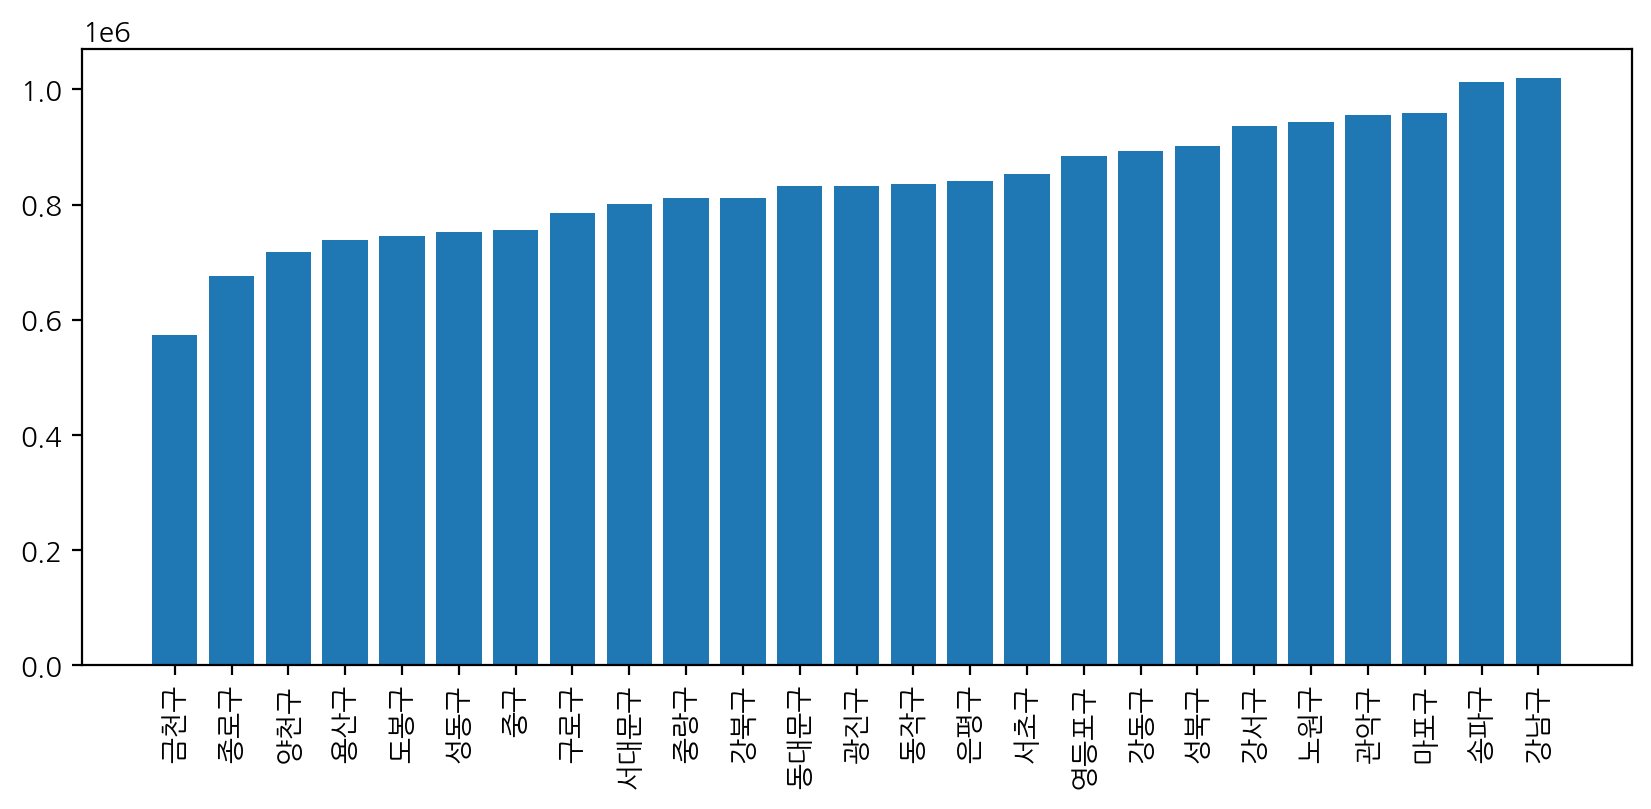

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
203     202209  일     1       종로구        중구  F  10   EE          200   12.04
204     202209  일     1       종로구        중구  F  15   EH          189    6.05
205     202209  일     1       종로구        중구  F  15   EE           38    8.03
206     202209  일     1       종로구        중구  F  15   WH          502    3.97
207     202209  일     1       종로구        중구  F  20   HE           46    6.05
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
565904  202209  토     1       강동구       송파구  M  70   EH           29    9.26
565905  202209  토     1       강

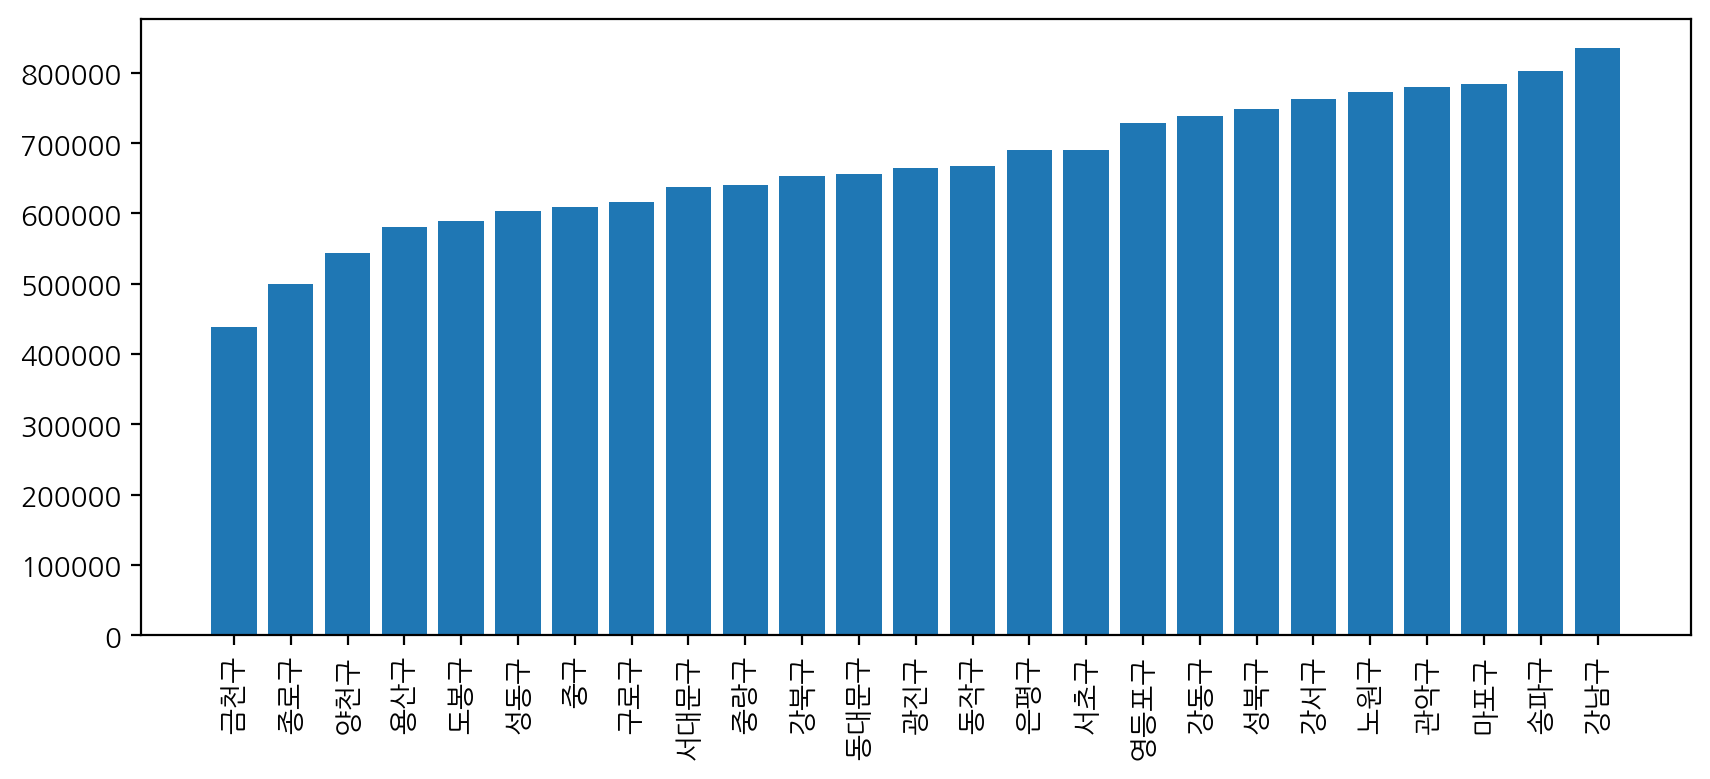

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
188     202209  일     2       종로구        중구  F  15   EE           77    6.05
189     202209  일     2       종로구        중구  F  20   WW           34       0
190     202209  일     2       종로구        중구  F  20   WE           38    4.32
191     202209  일     2       종로구        중구  F  20   HH           11       0
192     202209  일     2       종로구        중구  F  20   EH           35   36.73
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
411736  202209  토     2       강동구       송파구  M  65   WH           24   16.21
411737  202209  토     2       강

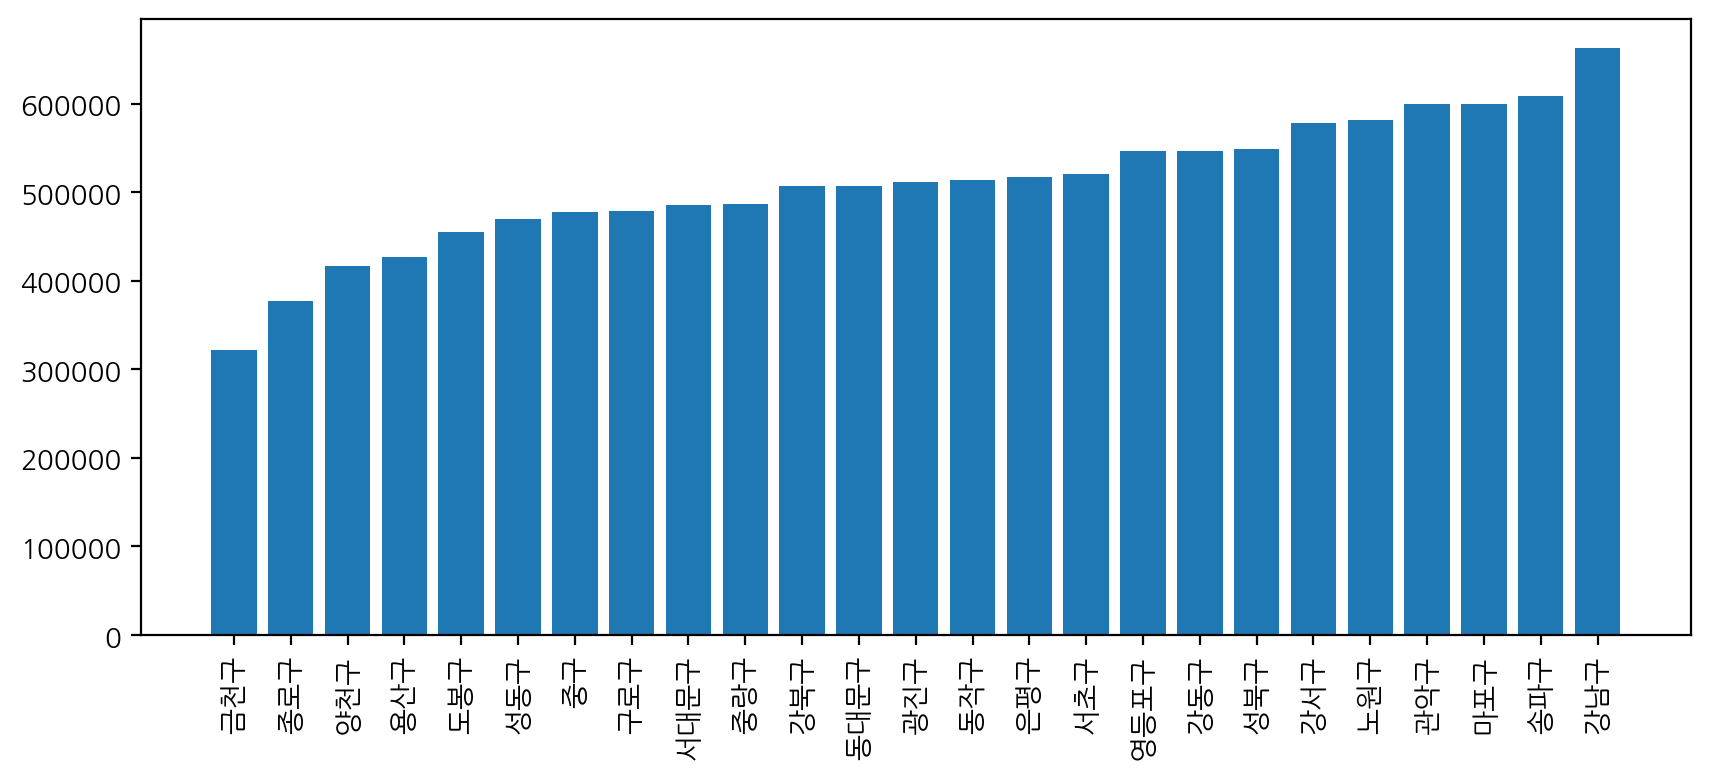

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
170     202209  일     3       종로구        중구  F  15   EE            6    4.09
171     202209  일     3       종로구        중구  F  15   EH           65    6.05
172     202209  일     3       종로구        중구  F  20   WW           34       0
173     202209  일     3       종로구        중구  F  20   HE           85    8.24
174     202209  일     3       종로구        중구  F  20   EE           52   65.31
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
341512  202209  토     3       강동구       송파구  M  70   EH          537    4.67
341513  202209  토     3       강

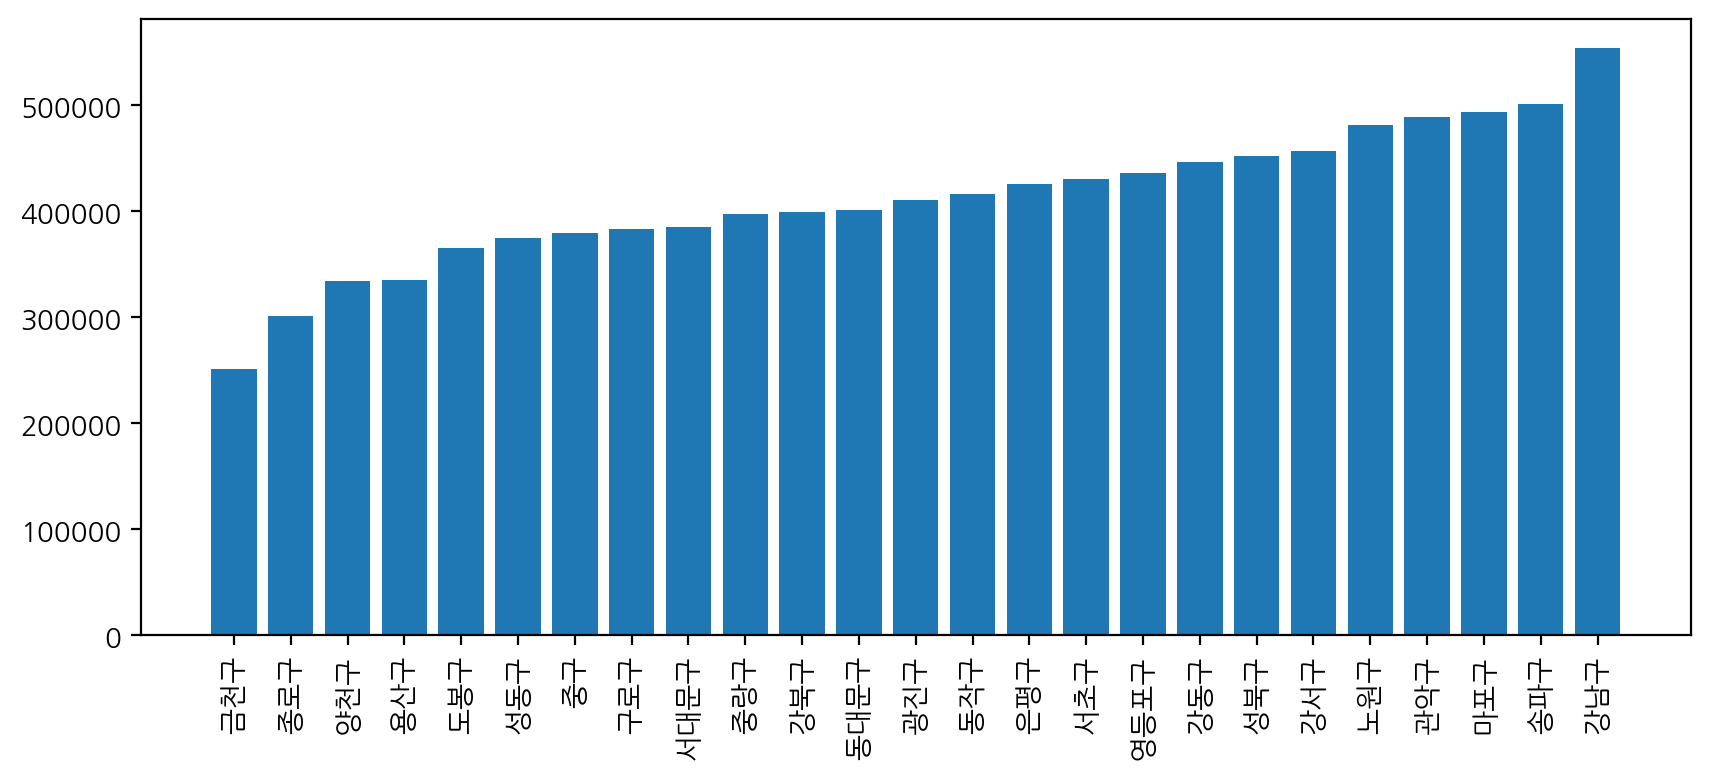

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
187     202209  일     4       종로구        중구  F  10   EE          109   11.99
188     202209  일     4       종로구        중구  F  15   EE           29   20.19
189     202209  일     4       종로구        중구  F  15   HH           11    6.05
190     202209  일     4       종로구        중구  F  20   EW           51    12.1
191     202209  일     4       종로구        중구  F  20   EH           34   22.43
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
354497  202209  토     4       강동구       송파구  M  70   HE          214    4.67
354498  202209  토     4       강

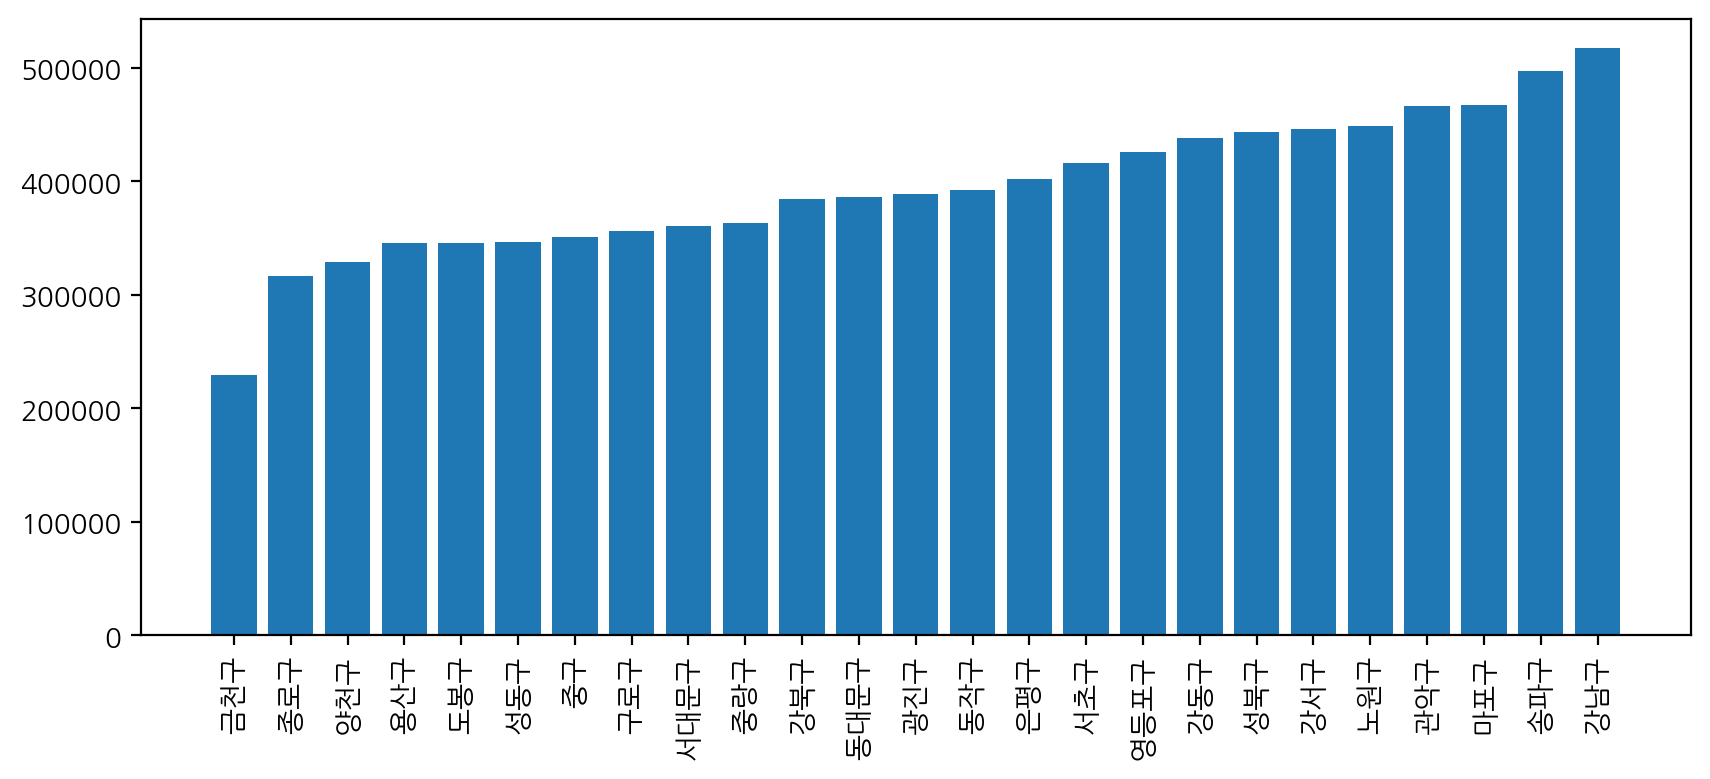

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
212     202209  일     5       종로구        중구  F  10   EE            9    6.02
213     202209  일     5       종로구        중구  F  15   EH           49    3.96
214     202209  일     5       종로구        중구  F  20   WE           22       0
215     202209  일     5       종로구        중구  F  20   HW            1       0
216     202209  일     5       종로구        중구  F  20   HE           16    6.05
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
504833  202209  토     5       강동구       송파구  M  75   EE           55   11.94
504834  202209  토     5       강

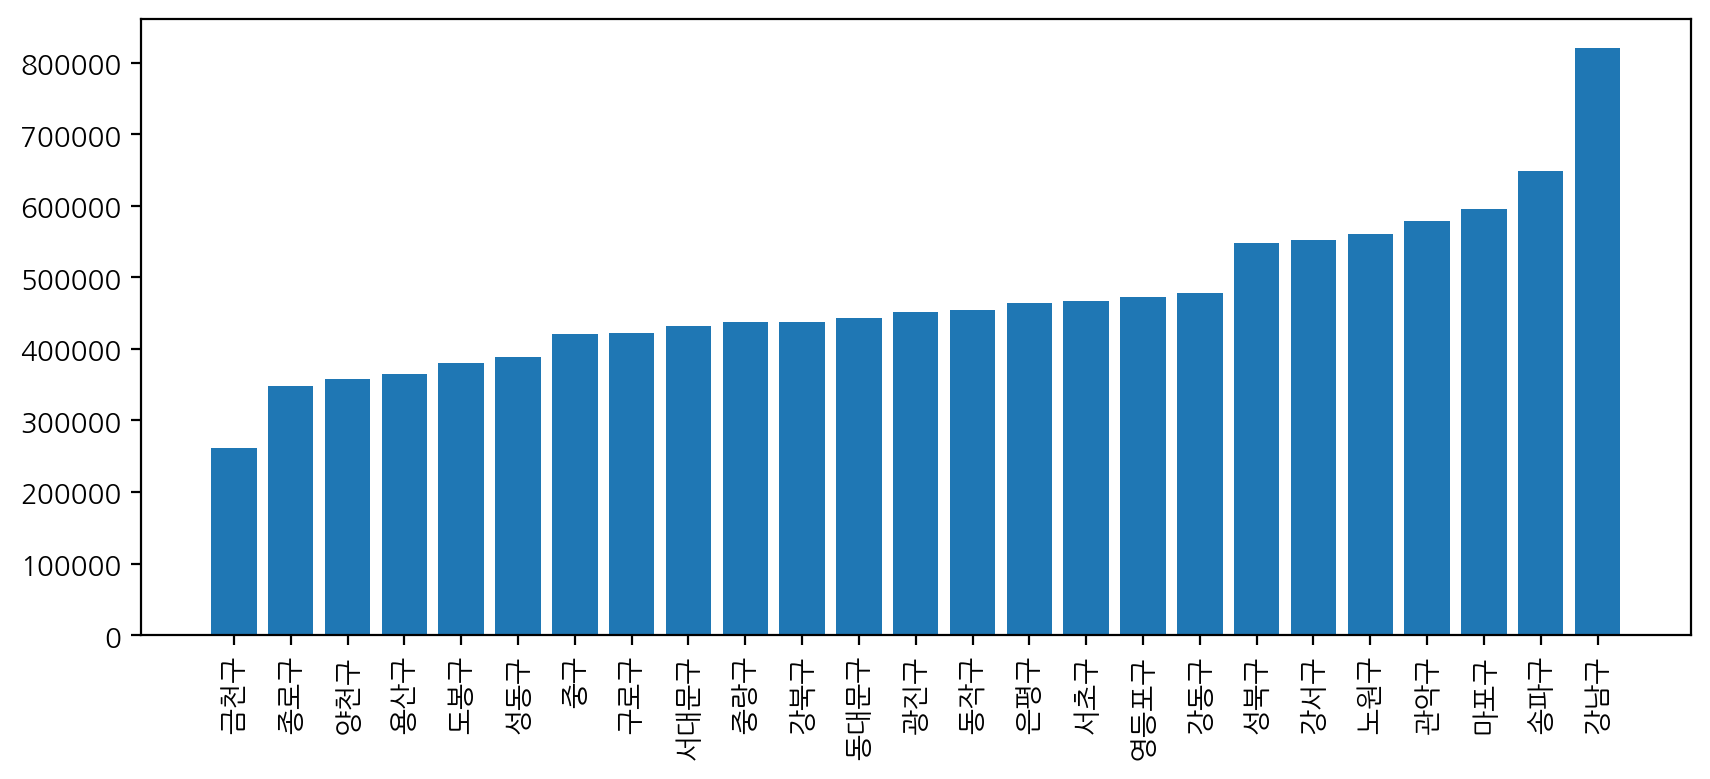

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
214     202209  일     6       종로구        중구  F  10   EE            5       6
215     202209  일     6       종로구        중구  F  15   HW           21   11.94
216     202209  일     6       종로구        중구  F  20   HH           21       0
217     202209  일     6       종로구        중구  F  20   HE           19   10.39
218     202209  일     6       종로구        중구  F  20   HW           32    6.49
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
768604  202209  토     6       강동구       송파구  M  80   HE           30   66.02
768605  202209  토     6       강

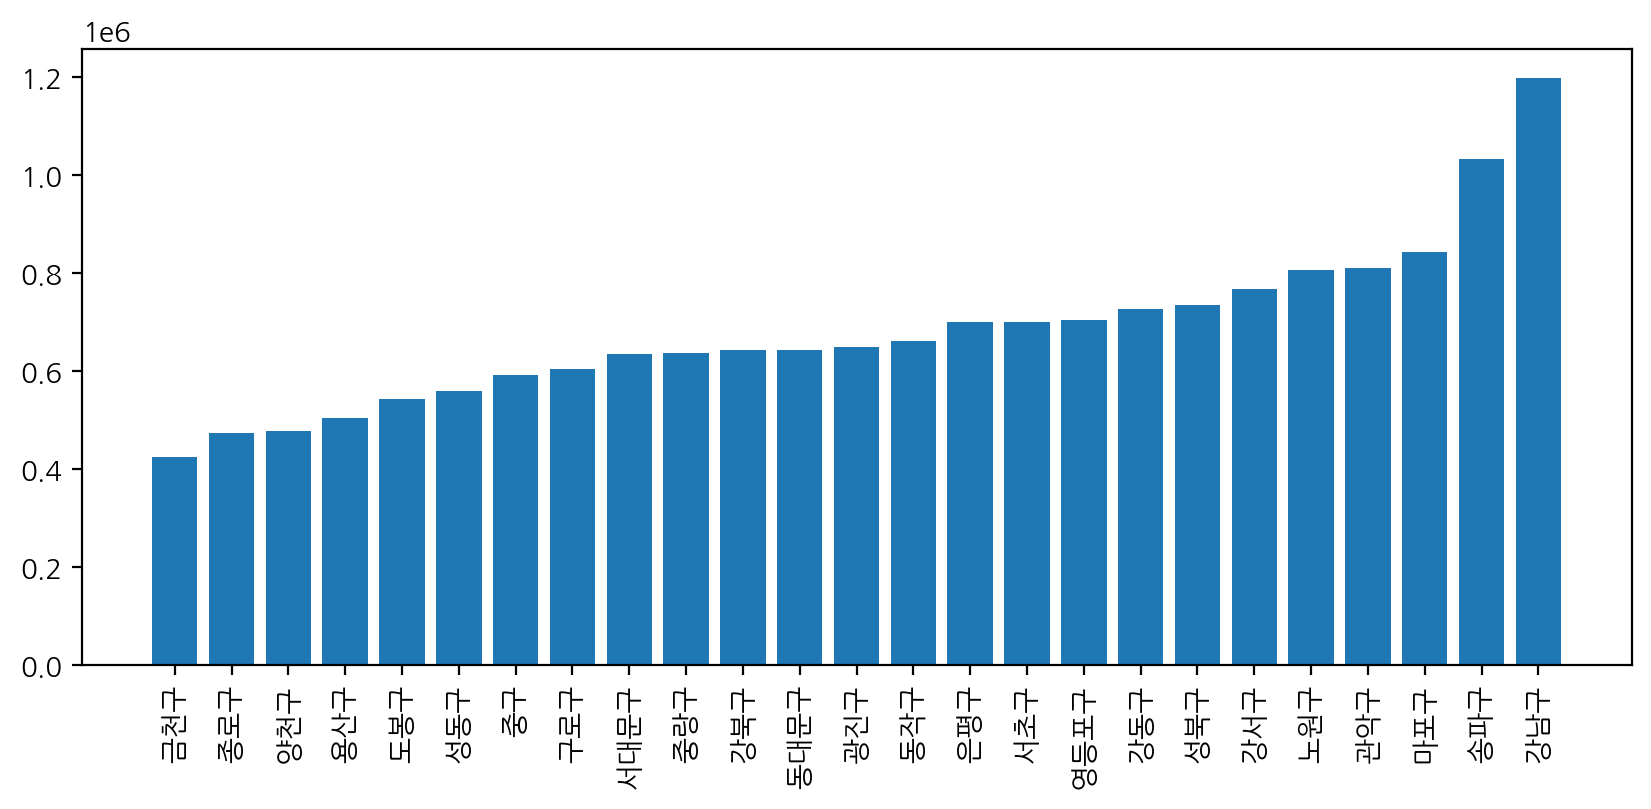

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
230     202209  일     7       종로구        중구  F  10   HW           33    5.78
231     202209  일     7       종로구        중구  F  10   HE           16    11.8
232     202209  일     7       종로구        중구  F  15   HE           16    4.08
233     202209  일     7       종로구        중구  F  15   EH           12    6.05
234     202209  일     7       종로구        중구  F  20   EH           15    20.3
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
978948  202209  토     7       강동구       송파구  M  75   HH           87    5.96
978949  202209  토     7       강

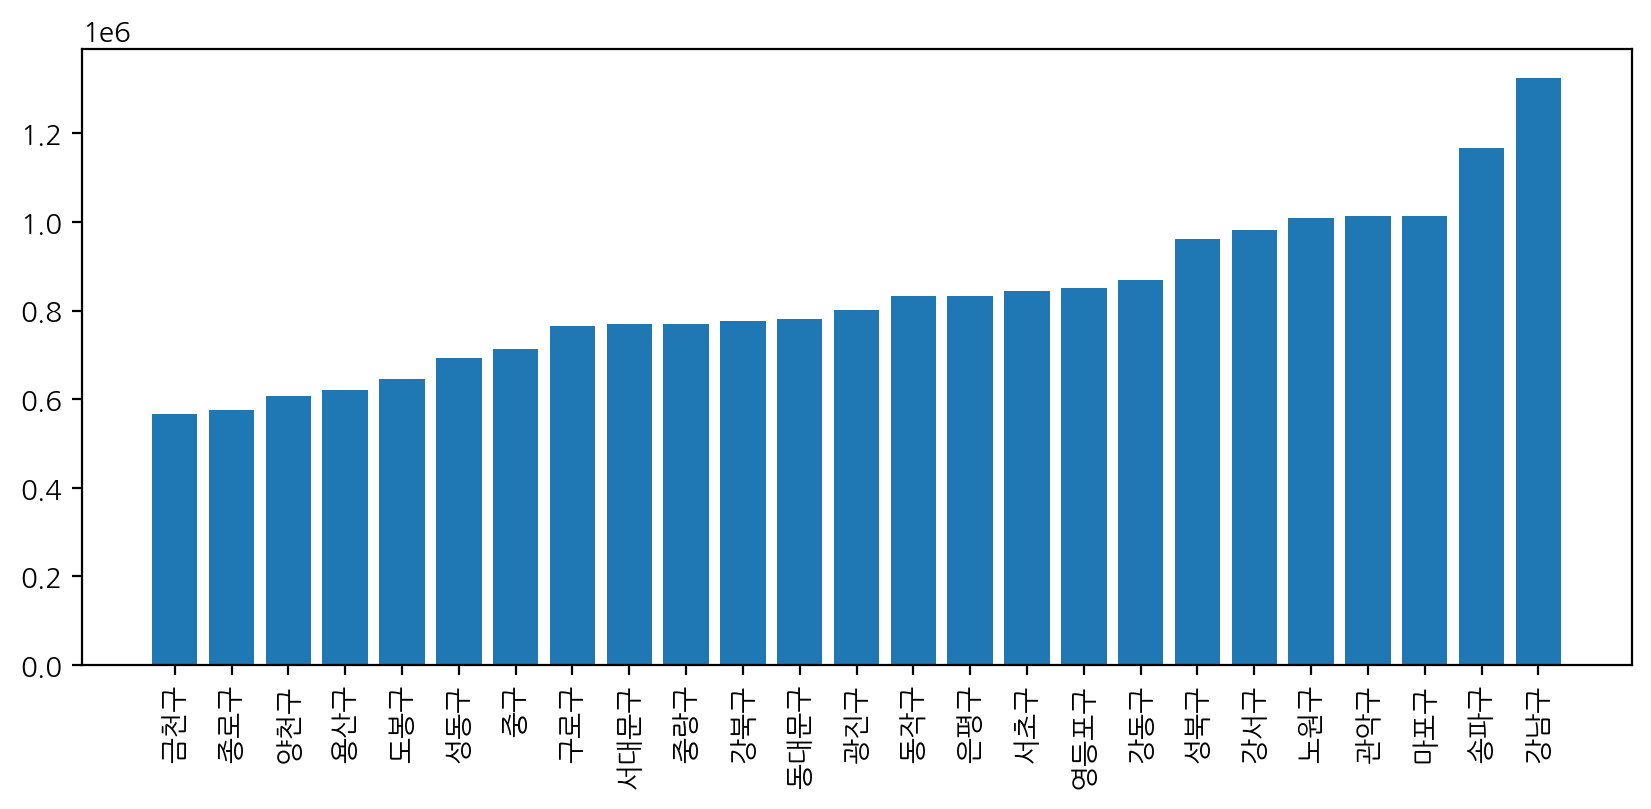

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
236      202209  일     8       종로구        중구  F   0   HE           17   27.94
237      202209  일     8       종로구        중구  F  10   EE           47    5.97
238      202209  일     8       종로구        중구  F  10   HE           54    5.96
239      202209  일     8       종로구        중구  F  15   HW           41    8.16
240      202209  일     8       종로구        중구  F  15   HE           33   38.65
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1201095  202209  토     8       강동구       송파구  M  80   EE           19   19.09
1201096  202209  토     

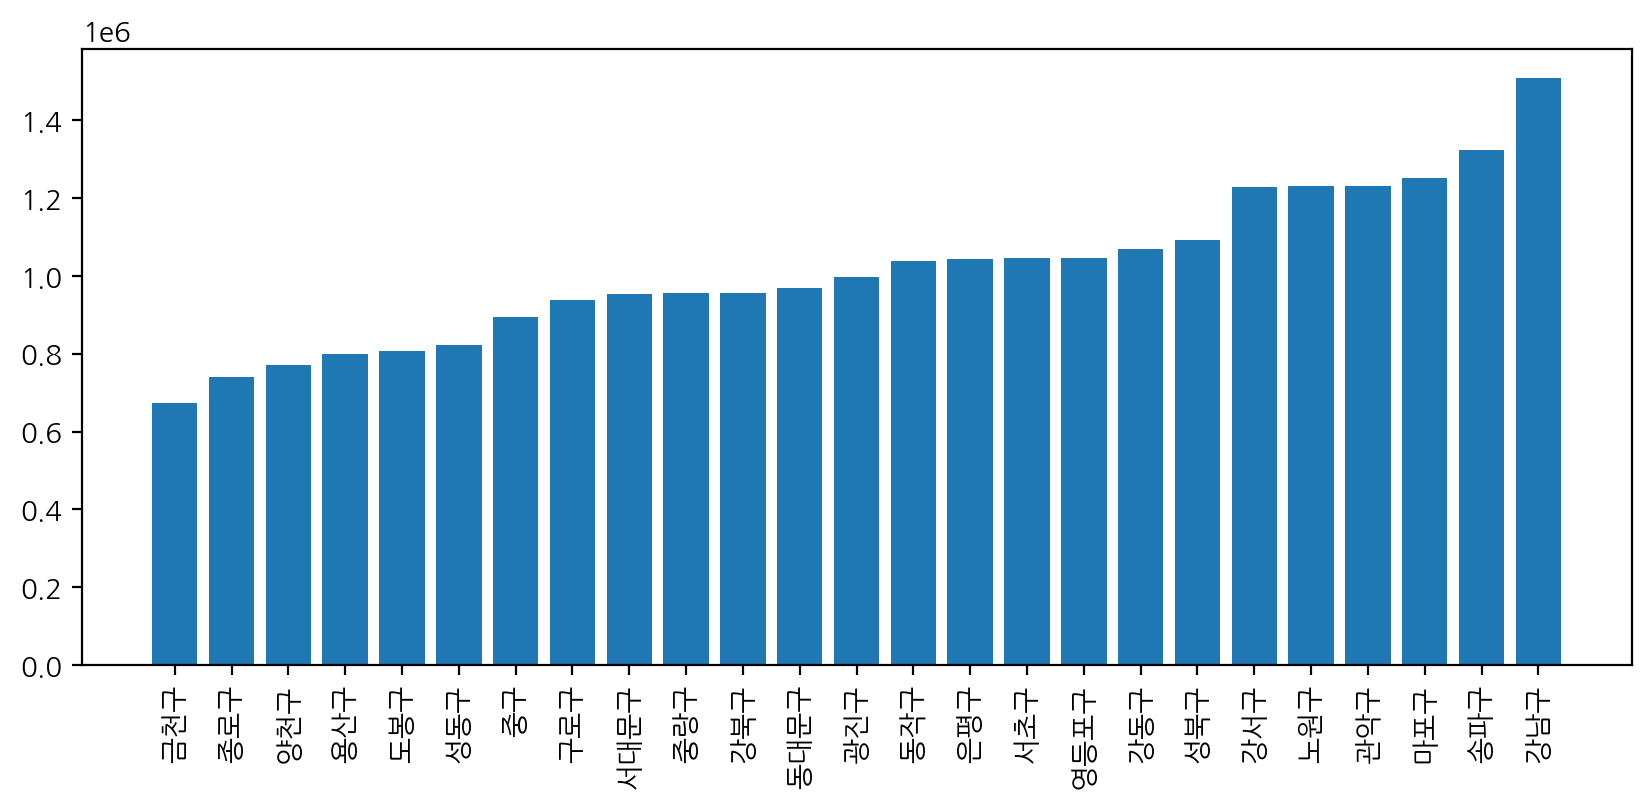

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
255      202209  일     9       종로구        중구  F   0   HW           10   55.94
256      202209  일     9       종로구        중구  F   0   EE           28   27.61
257      202209  일     9       종로구        중구  F   0   HE           90   27.94
258      202209  일     9       종로구        중구  F  10   HE           53   71.33
259      202209  일     9       종로구        중구  F  10   EE           28      12
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1322413  202209  토     9       강동구       송파구  M  75   WE            3    5.95
1322414  202209  토     

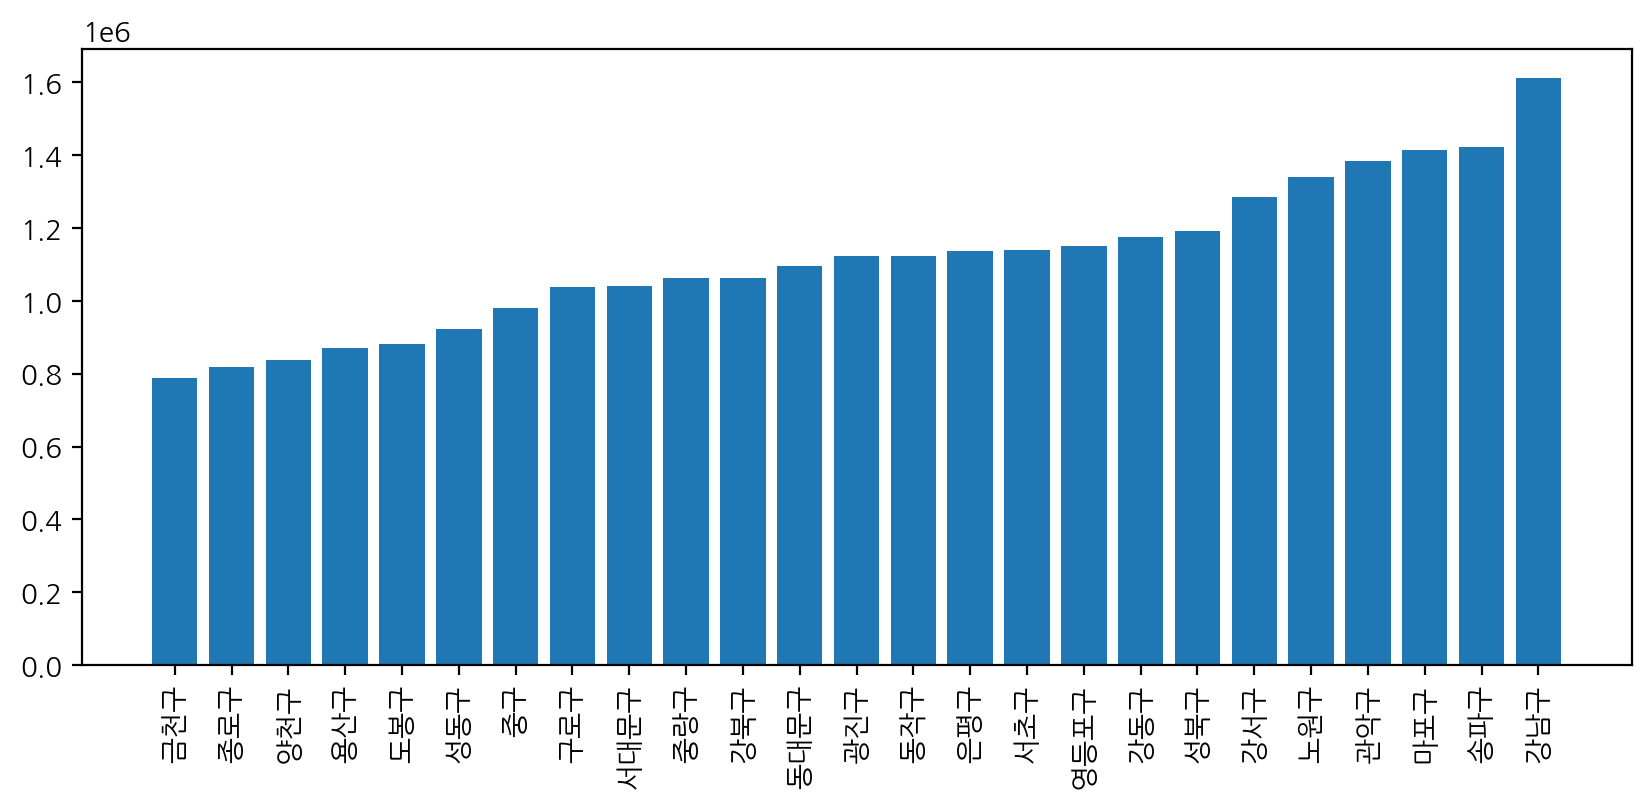

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
263      202209  일    10       종로구        중구  F   0   EE           57    55.7
264      202209  일    10       종로구        중구  F  10   EH           21    5.96
265      202209  일    10       종로구        중구  F  10   EE           26   35.88
266      202209  일    10       종로구        중구  F  10   HE           26   29.69
267      202209  일    10       종로구        중구  F  15   EE           49   32.44
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1411083  202209  토    10       강동구       송파구  M  75   HW           94   77.28
1411084  202209  토    1

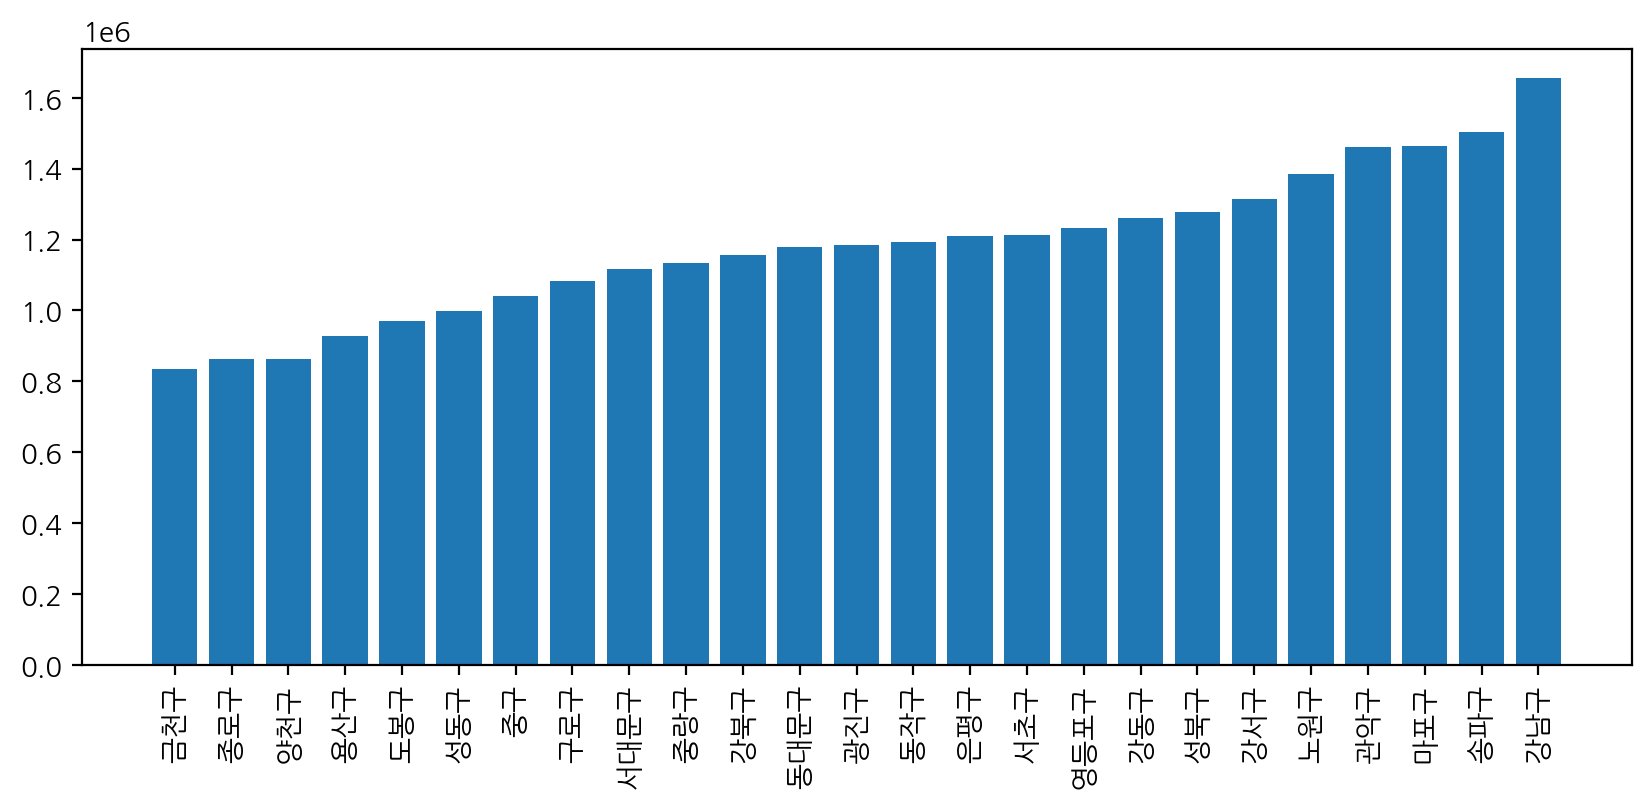

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
269      202209  일    11       종로구        중구  F   0   EE           45  393.52
270      202209  일    11       종로구        중구  F   0   HE           20   27.89
271      202209  일    11       종로구        중구  F  10   EE           41  167.26
272      202209  일    11       종로구        중구  F  10   HE           39   71.44
273      202209  일    11       종로구        중구  F  15   HW           23   10.12
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1497192  202209  토    11       강동구       송파구  M  80   WW           45    9.46
1497193  202209  토    1

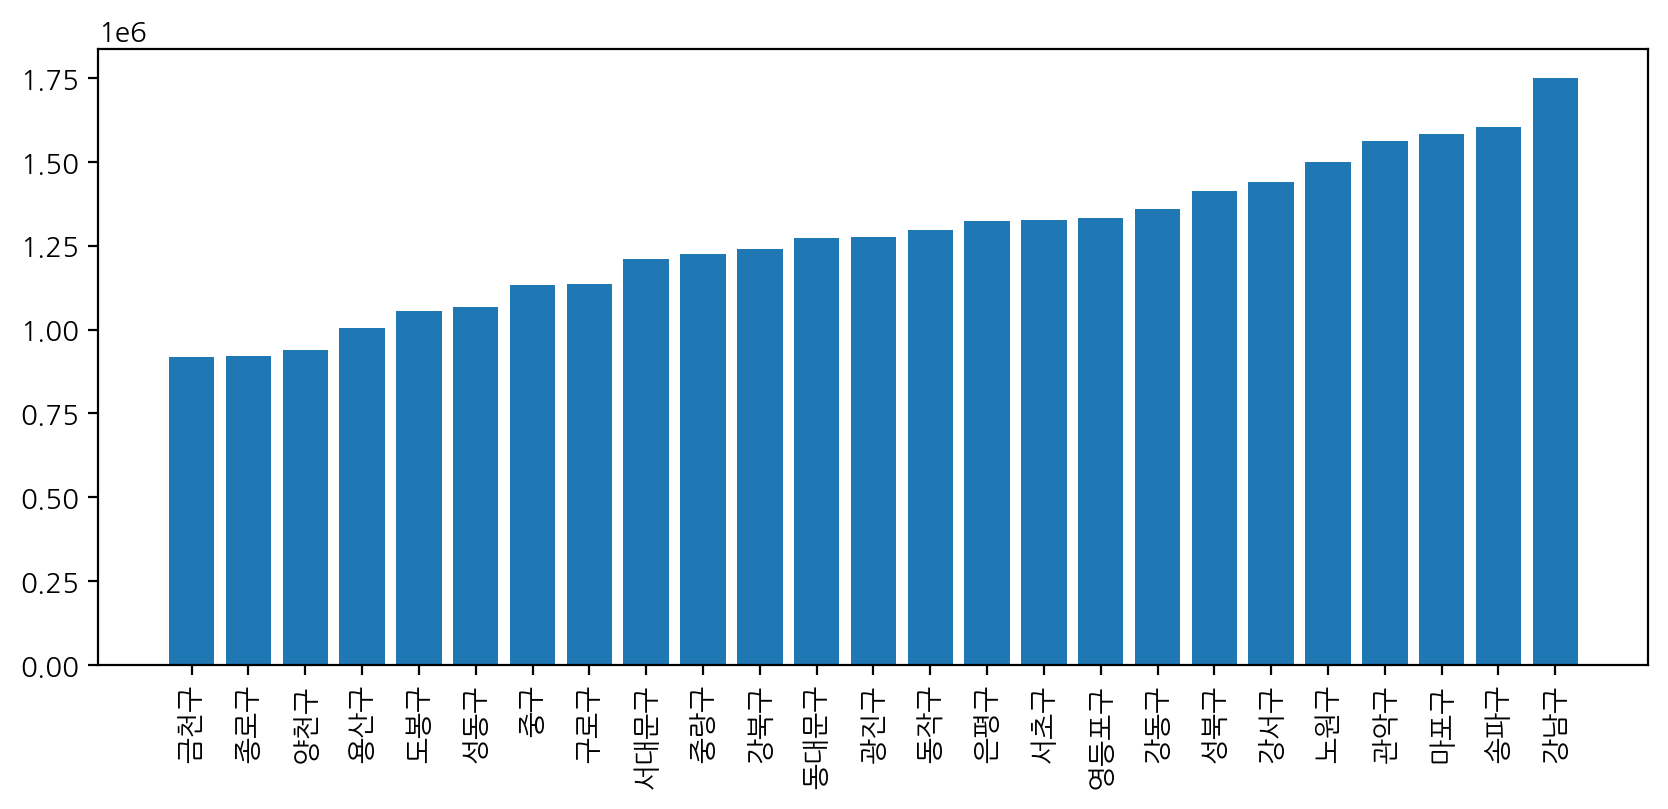

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
272      202209  일    12       종로구        중구  F   0   HE           32   54.96
273      202209  일    12       종로구        중구  F   0   EE           27  168.08
274      202209  일    12       종로구        중구  F  10   HE           31    29.6
275      202209  일    12       종로구        중구  F  10   EE           41  107.26
276      202209  일    12       종로구        중구  F  10   WE           13    5.94
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1605127  202209  토    12       강동구       송파구  M  80   EW           30     9.5
1605128  202209  토    1

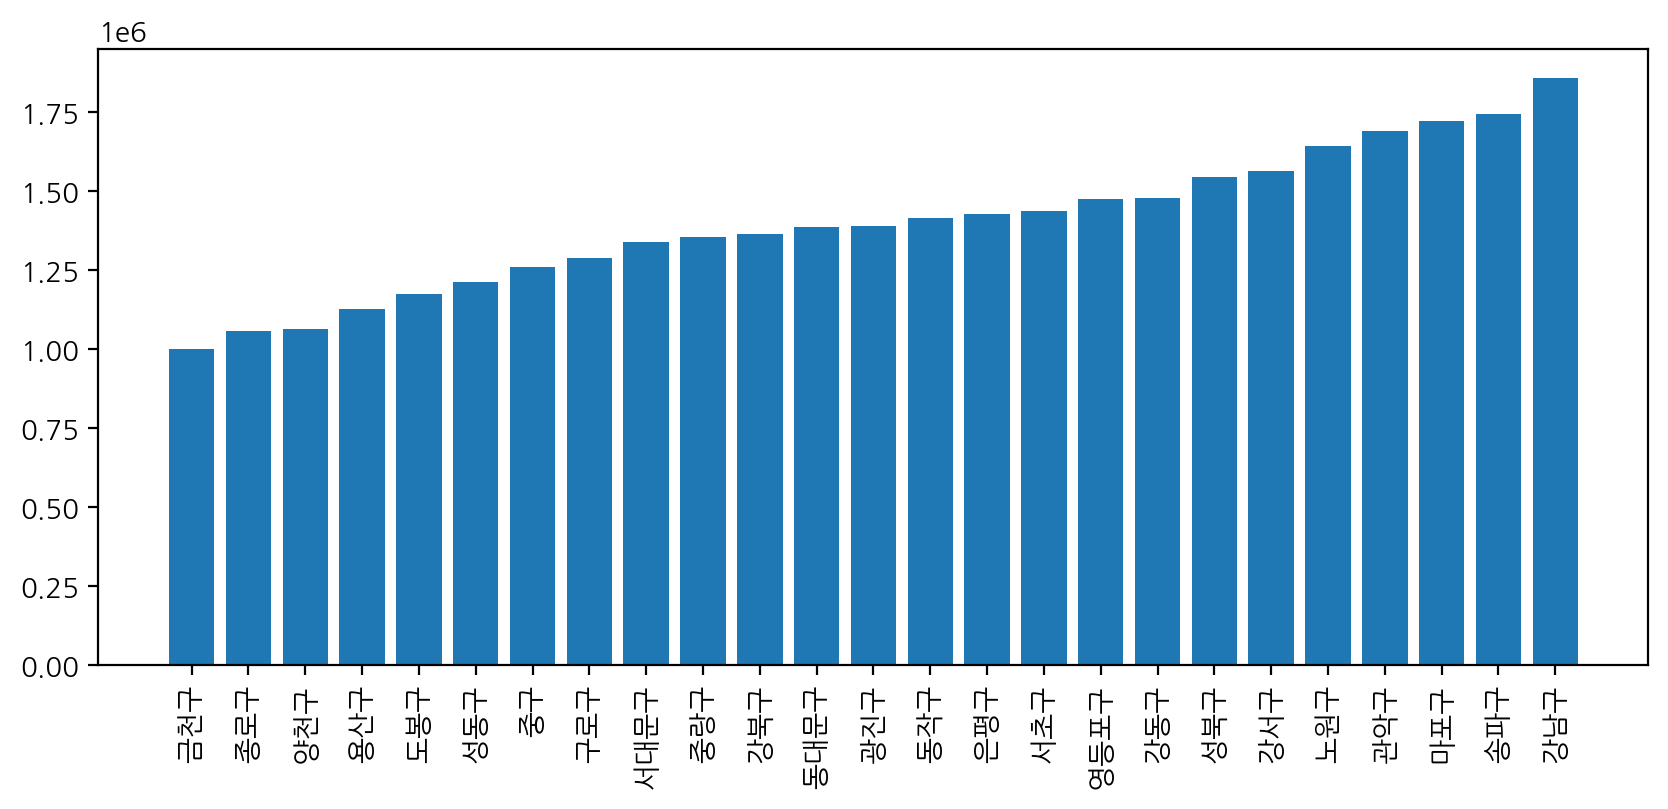

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
272      202209  일    13       종로구        중구  F   0   EE           35  392.15
273      202209  일    13       종로구        중구  F   0   HE          141   56.36
274      202209  일    13       종로구        중구  F  10   EE           51  113.68
275      202209  일    13       종로구        중구  F  10   HE           39   35.93
276      202209  일    13       종로구        중구  F  10   EH           56   18.06
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1659954  202209  토    13       강동구       송파구  M  80   WH           31   18.91
1659955  202209  토    1

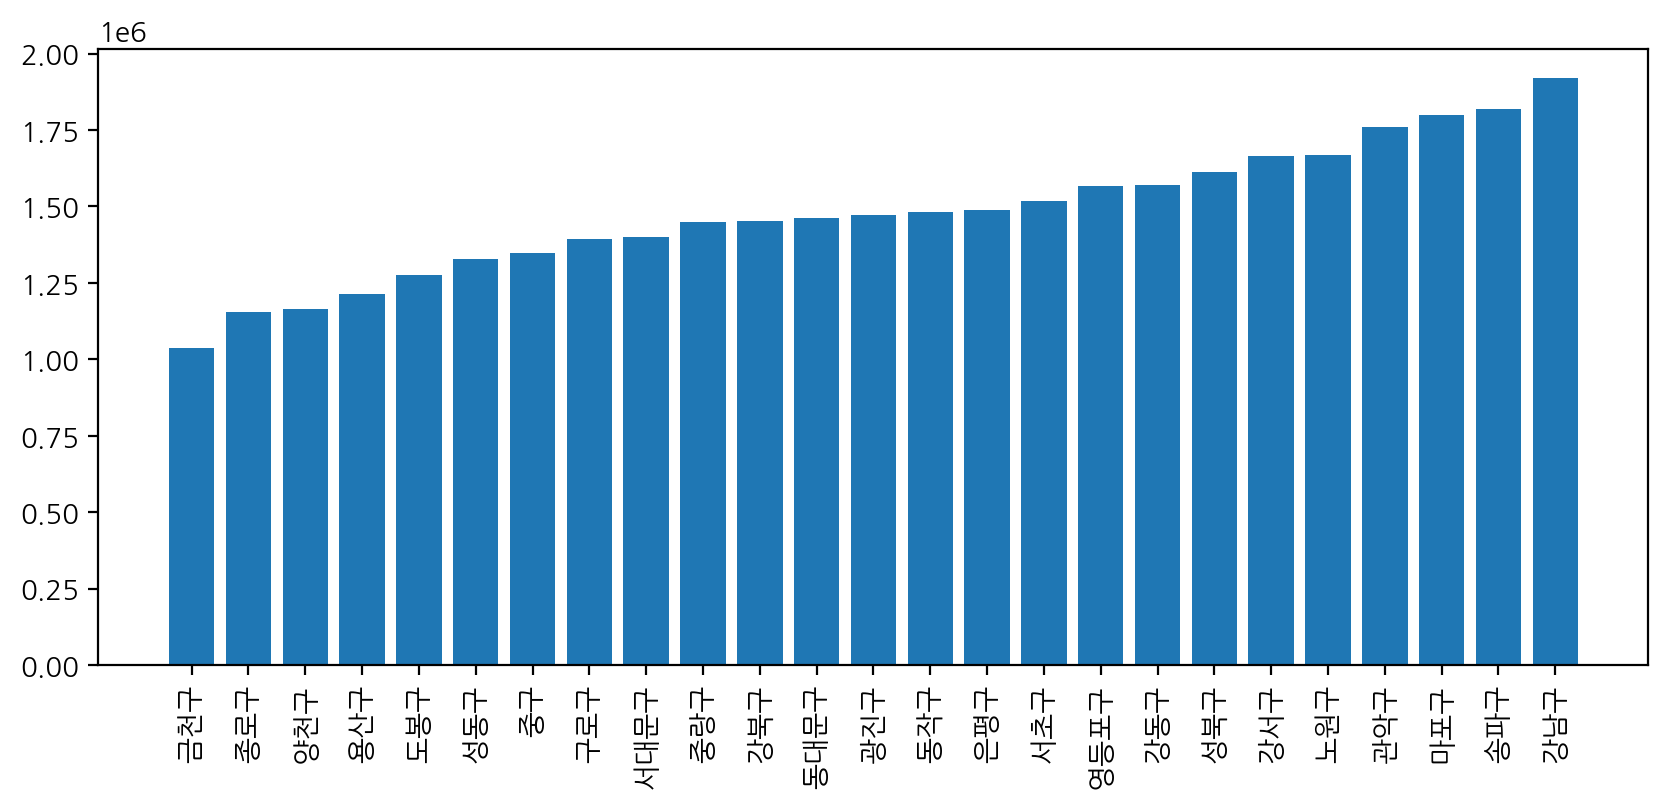

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
273      202209  일    14       종로구        중구  F   0   EH           39    27.9
274      202209  일    14       종로구        중구  F   0   WH           21   27.72
275      202209  일    14       종로구        중구  F   0   EE           40   55.82
276      202209  일    14       종로구        중구  F   0   HE           17   27.92
277      202209  일    14       종로구        중구  F  10   HE           49   59.63
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1658091  202209  토    14       강동구       송파구  M  80   WH           59      19
1658092  202209  토    1

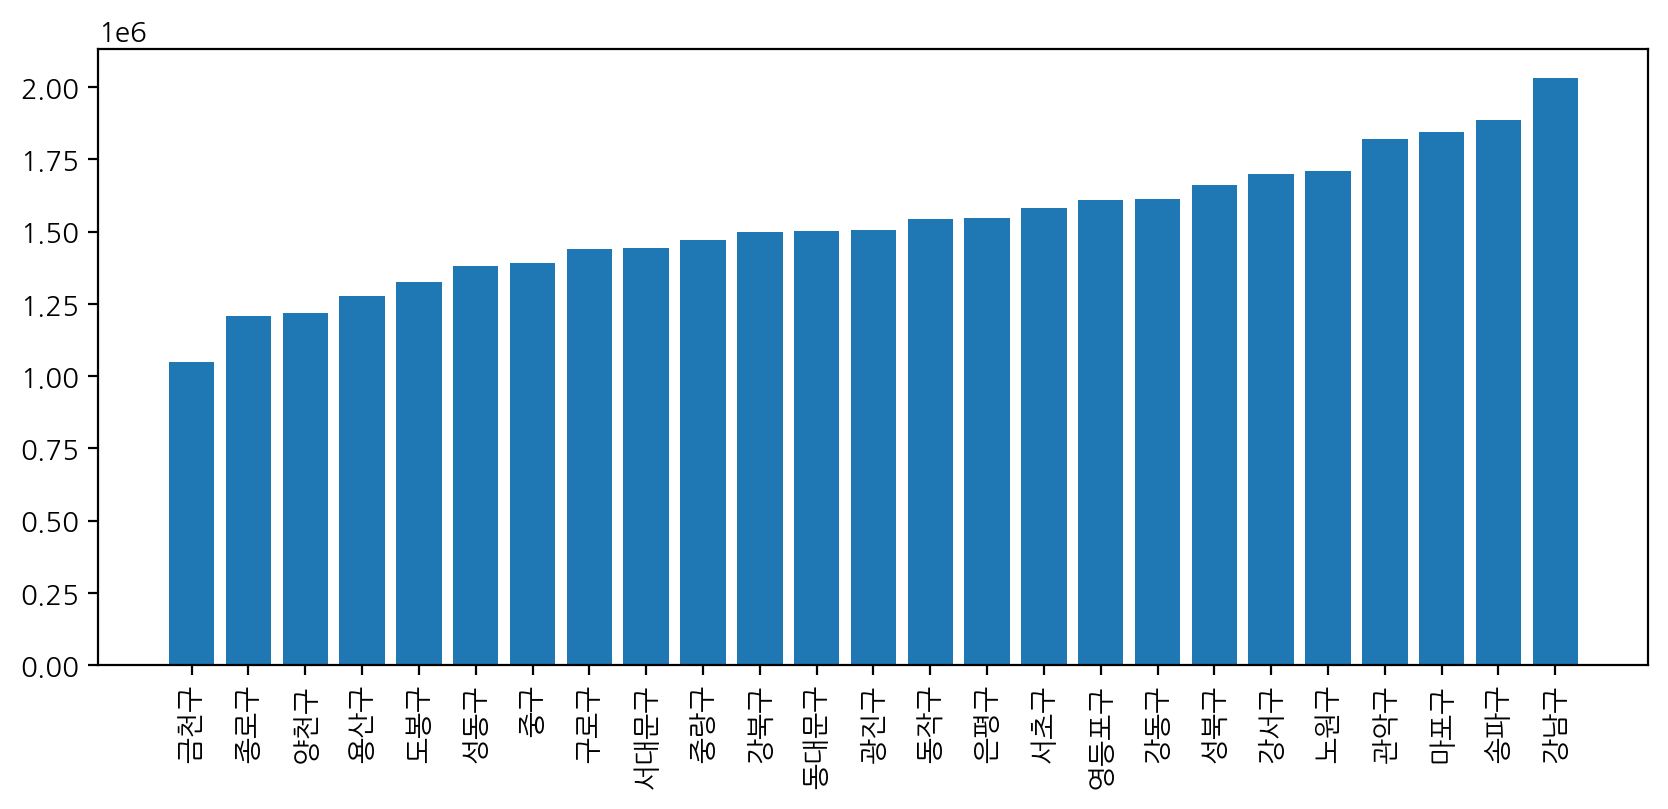

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
275      202209  일    15       종로구        중구  F   0   WH           53   27.72
276      202209  일    15       종로구        중구  F   0   HE          109   83.32
277      202209  일    15       종로구        중구  F   0   EE           55  504.94
278      202209  일    15       종로구        중구  F  10   EH           37   23.43
279      202209  일    15       종로구        중구  F  10   HW          123    5.95
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1687257  202209  토    15       강동구       송파구  M  80   EE           48   57.05
1687258  202209  토    1

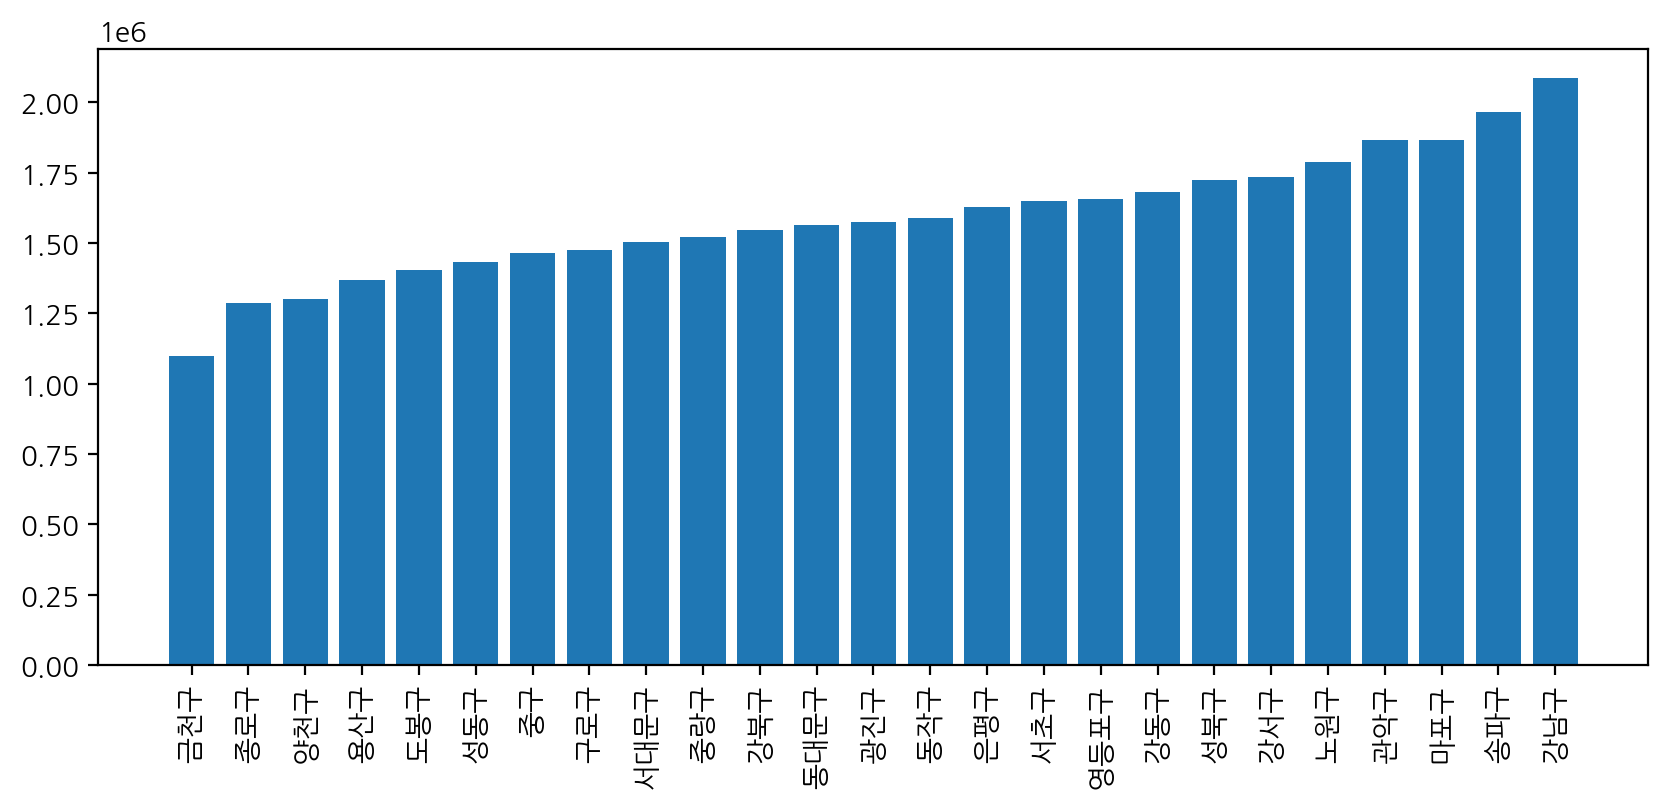

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
276      202209  일    16       종로구        중구  F   0   HE           33   82.38
277      202209  일    16       종로구        중구  F   0   EE           60  533.05
278      202209  일    16       종로구        중구  F   0   EH           36    55.9
279      202209  일    16       종로구        중구  F  10   WE          179    5.93
280      202209  일    16       종로구        중구  F  10   EH           46      77
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1757942  202209  토    16       강동구       송파구  M  80   EH           54   94.95
1757943  202209  토    1

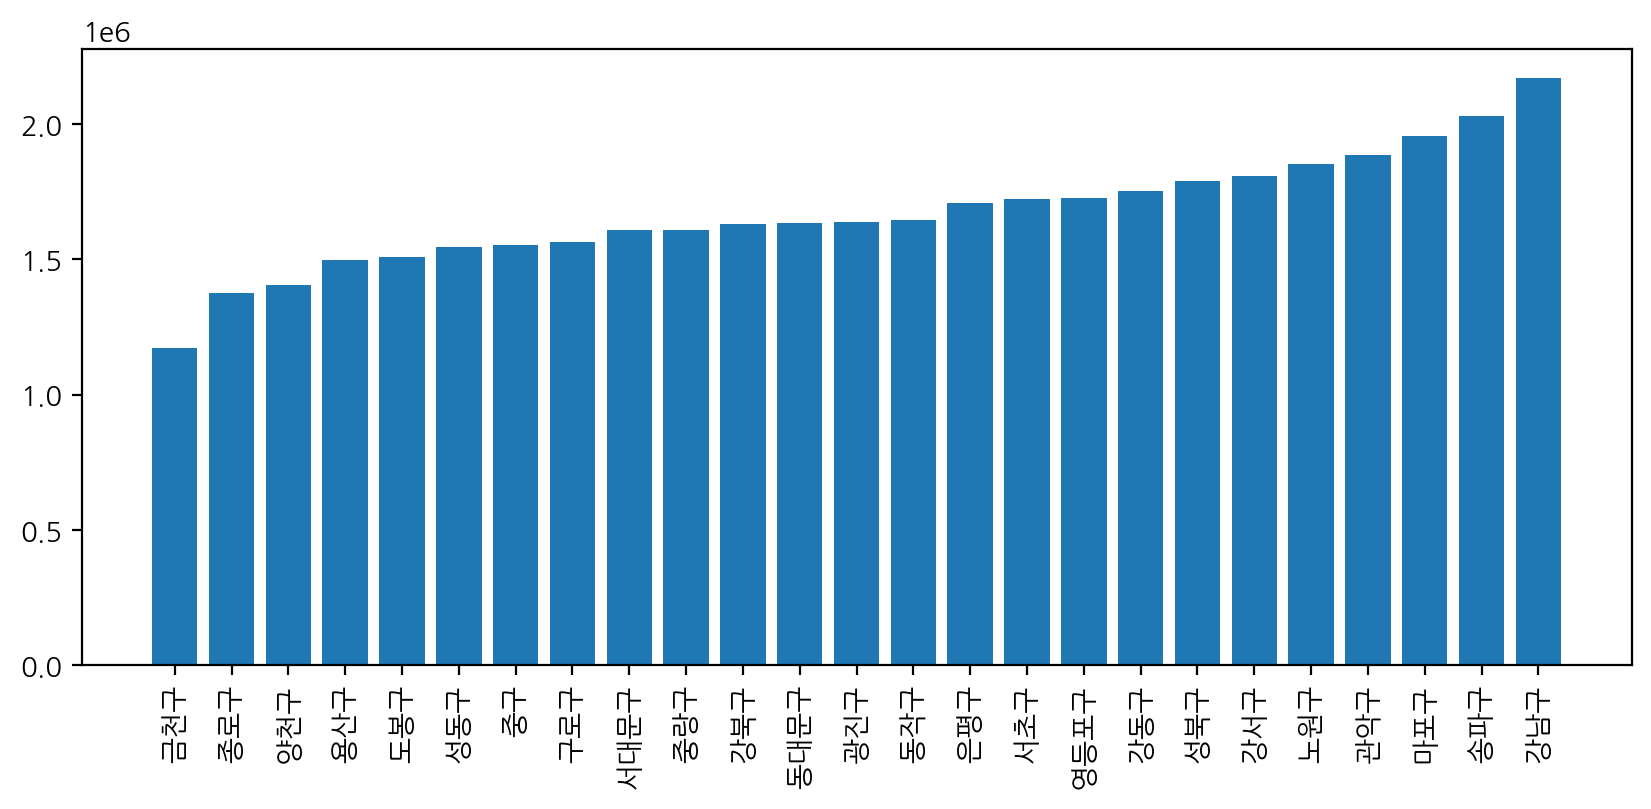

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
273      202209  일    17       종로구        중구  F   0   EE           53  475.11
274      202209  일    17       종로구        중구  F   0   HE          146   27.44
275      202209  일    17       종로구        중구  F   0   EH           23   28.07
276      202209  일    17       종로구        중구  F  10   EE           50  203.11
277      202209  일    17       종로구        중구  F  10   HE           45   17.75
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1839586  202209  토    17       강동구       송파구  M  75   WH           19   29.71
1839587  202209  토    1

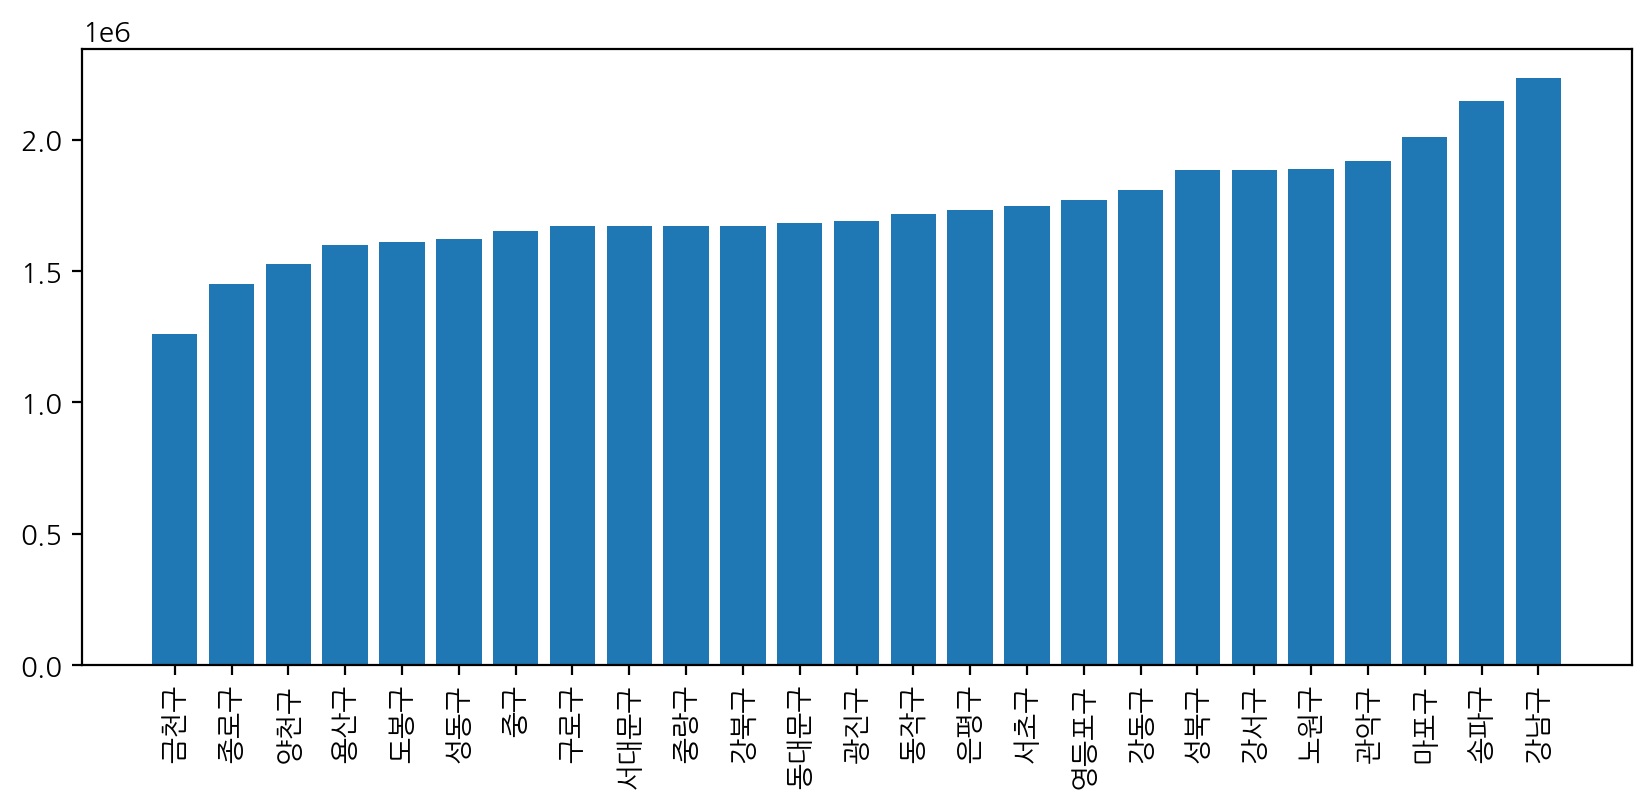

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
274      202209  일    18       종로구        중구  F   0   EE           39  196.59
275      202209  일    18       종로구        중구  F   0   WE          122   27.77
276      202209  일    18       종로구        중구  F   0   HE           46   27.52
277      202209  일    18       종로구        중구  F   0   EH           30    27.9
278      202209  일    18       종로구        중구  F  10   EE           51  161.41
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1846656  202209  토    18       강동구       송파구  M  80   HE           90    47.5
1846657  202209  토    1

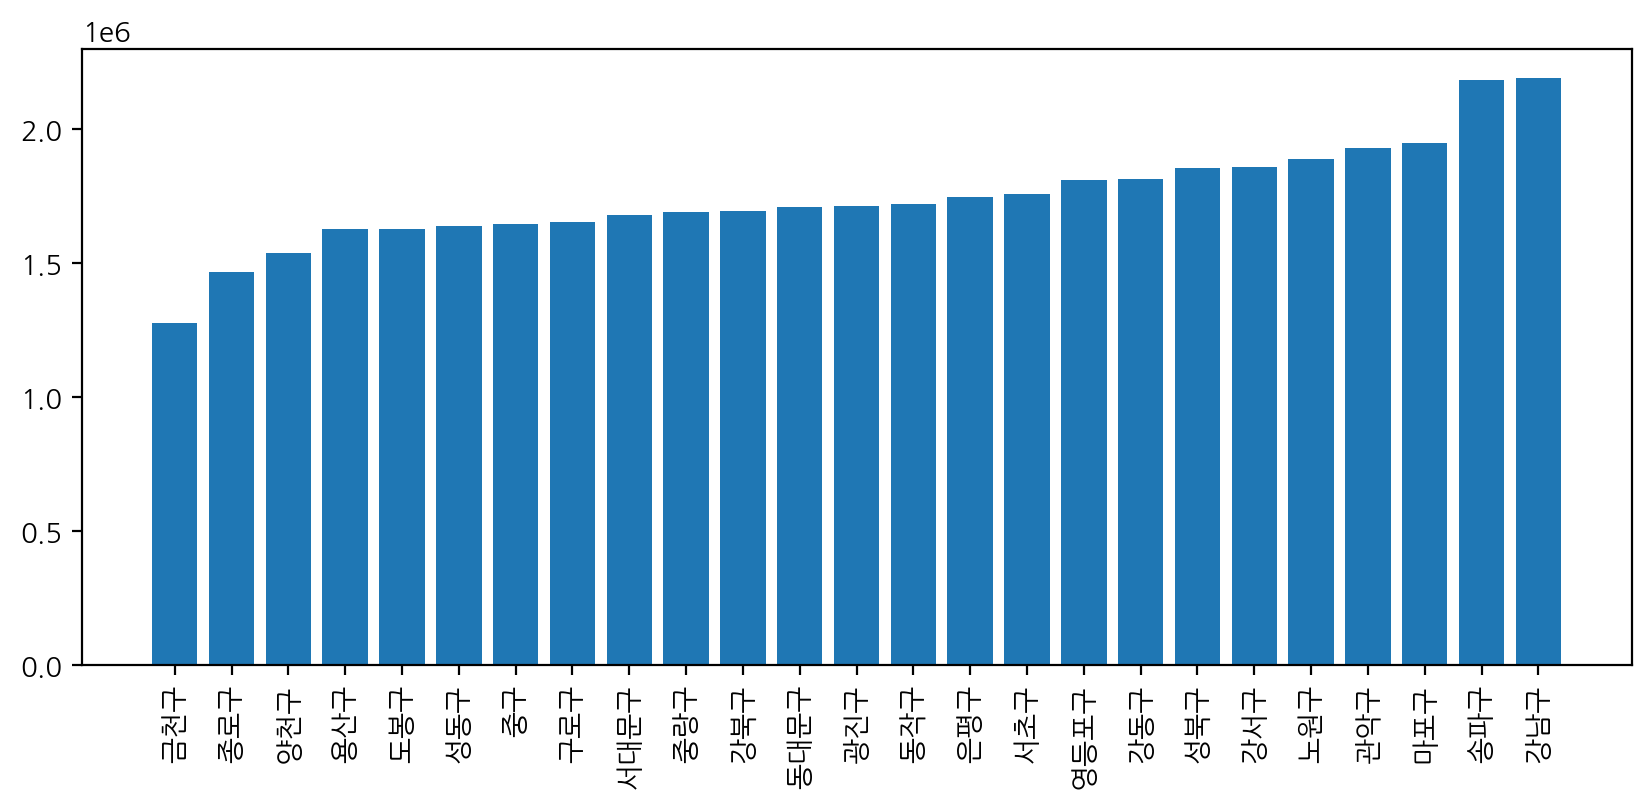

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
270      202209  일    19       종로구        중구  F   0   EE           61  251.92
271      202209  일    19       종로구        중구  F   0   HE           58   27.89
272      202209  일    19       종로구        중구  F   0   EH           97    27.9
273      202209  일    19       종로구        중구  F  10   HE           46    5.93
274      202209  일    19       종로구        중구  F  10   WE           28    5.69
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1760267  202209  토    19       강동구       송파구  M  75   WH           39   41.78
1760268  202209  토    1

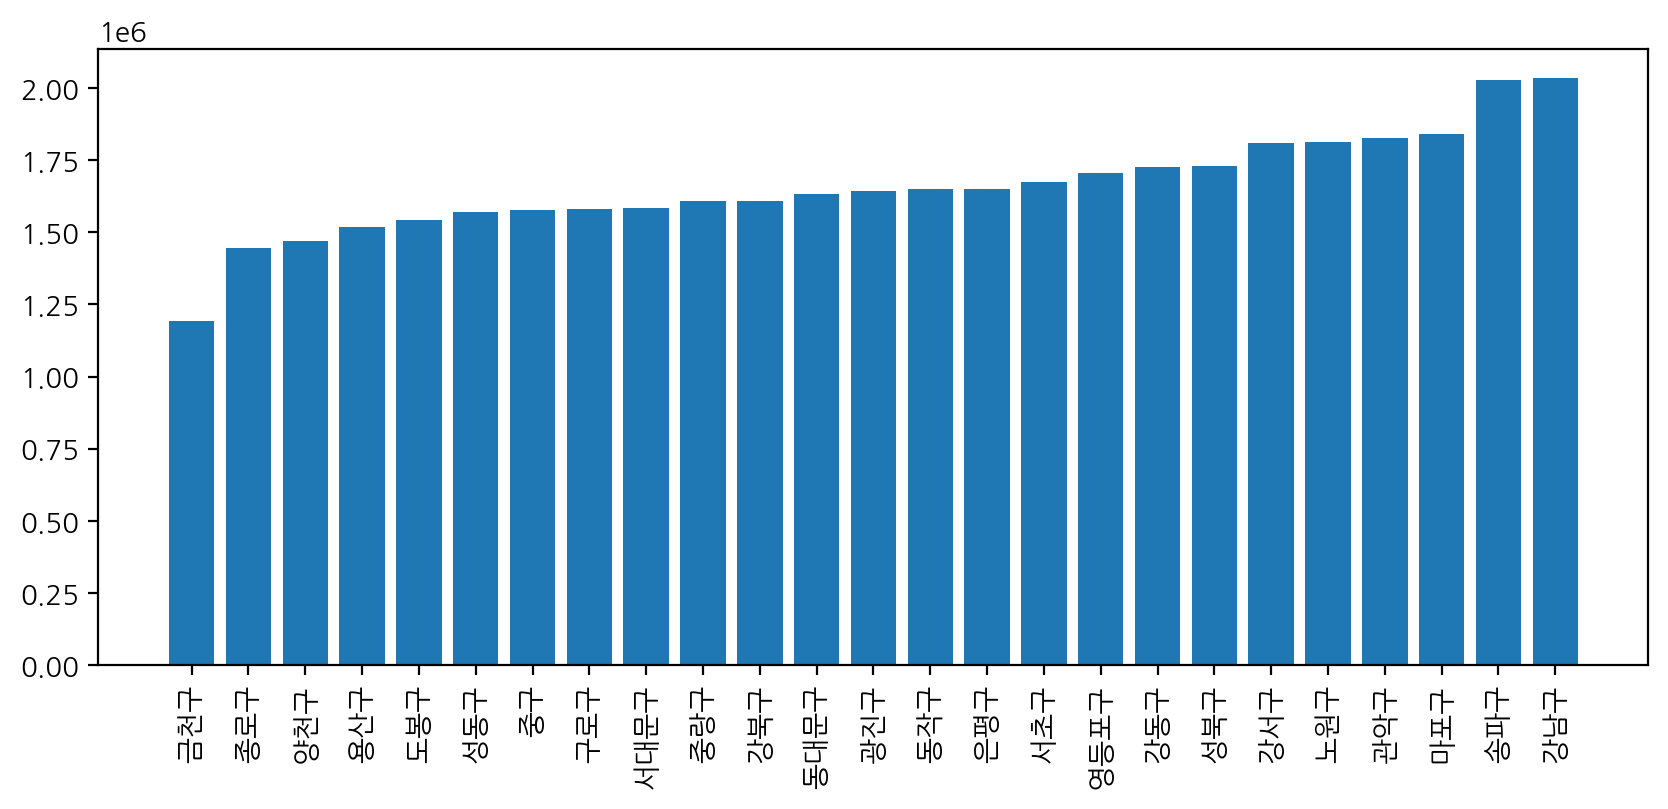

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
260      202209  일    20       종로구        중구  F   0   EW            9   27.71
261      202209  일    20       종로구        중구  F   0   EE          117   27.79
262      202209  일    20       종로구        중구  F   0   EH          258    55.2
263      202209  일    20       종로구        중구  F  10   EH           58   35.86
264      202209  일    20       종로구        중구  F  10   EE           93   53.36
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1554806  202209  토    20       강동구       송파구  M  75   WE           43    6.02
1554807  202209  토    2

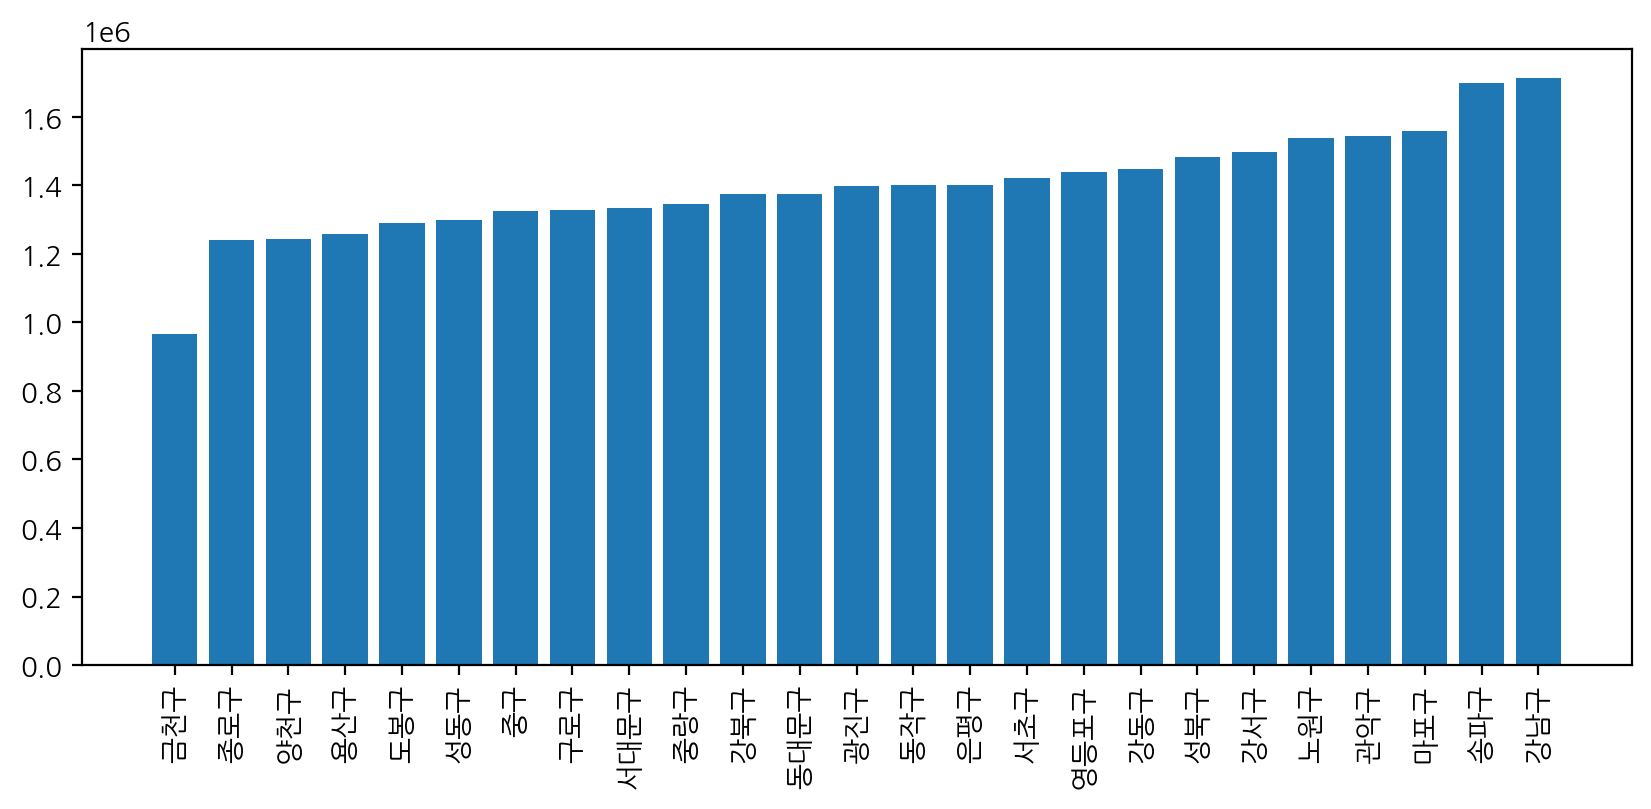

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
252      202209  일    21       종로구        중구  F   0   HH           21   27.35
253      202209  일    21       종로구        중구  F   0   EH           25   55.34
254      202209  일    21       종로구        중구  F  10   EE           80   23.96
255      202209  일    21       종로구        중구  F  10   EH           38    5.69
256      202209  일    21       종로구        중구  F  15   EE           43   72.55
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1377413  202209  토    21       강동구       송파구  M  75   WH           66   53.86
1377414  202209  토    2

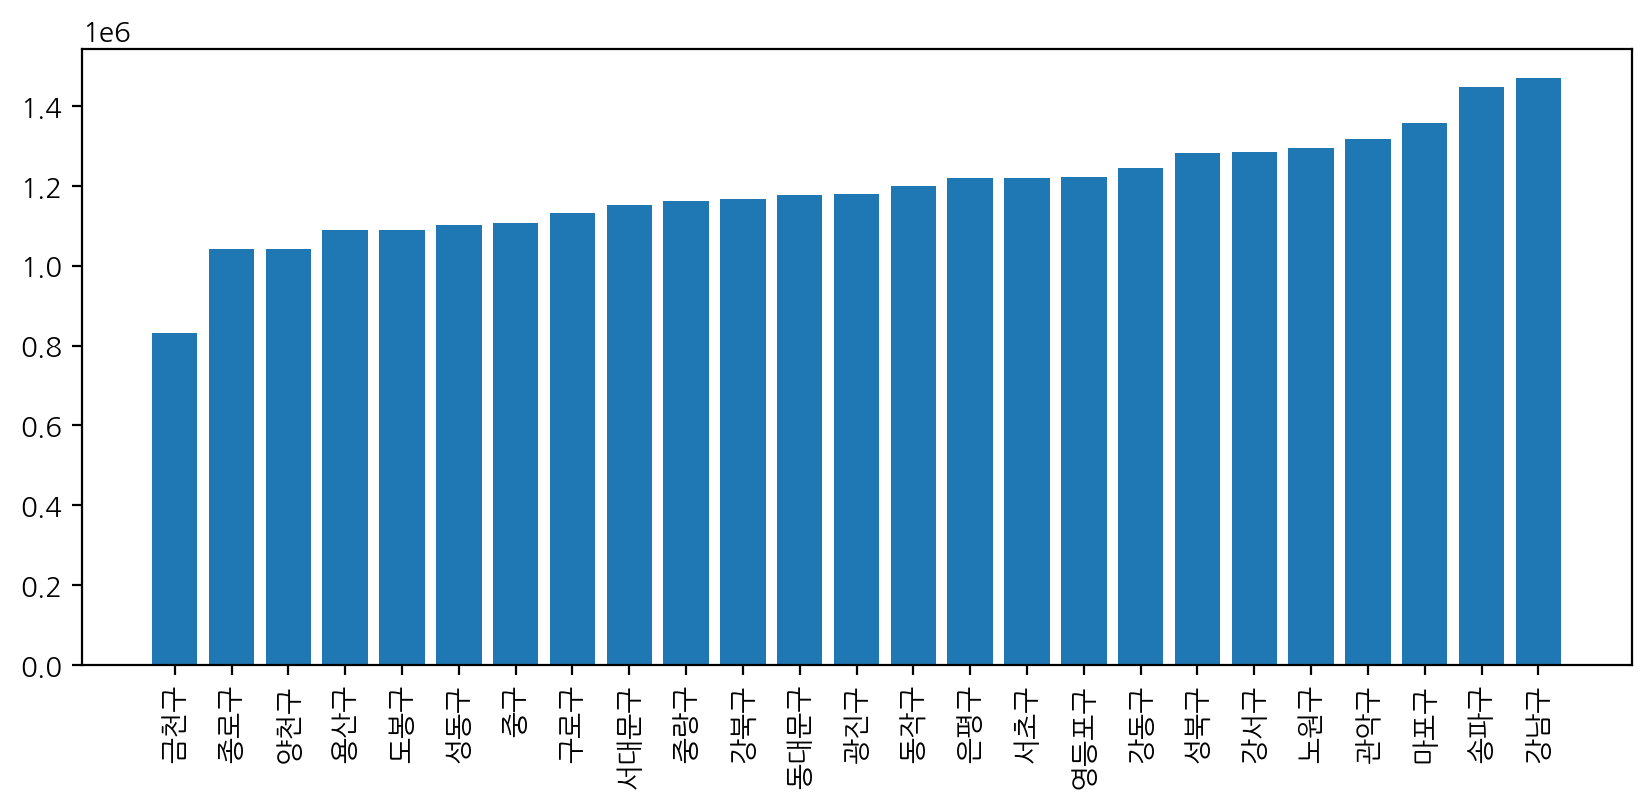

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
           대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
244      202209  일    22       종로구        중구  F  10   EE           61   29.89
245      202209  일    22       종로구        중구  F  15   HE           83    8.03
246      202209  일    22       종로구        중구  F  15   WW           17    4.03
247      202209  일    22       종로구        중구  F  15   HH            7    3.98
248      202209  일    22       종로구        중구  F  15   EH           58   53.84
...         ... ..   ...       ...       ... ..  ..  ...          ...     ...
1221340  202209  토    22       강동구       송파구  M  75   HE           25   10.92
1221341  202209  토    2

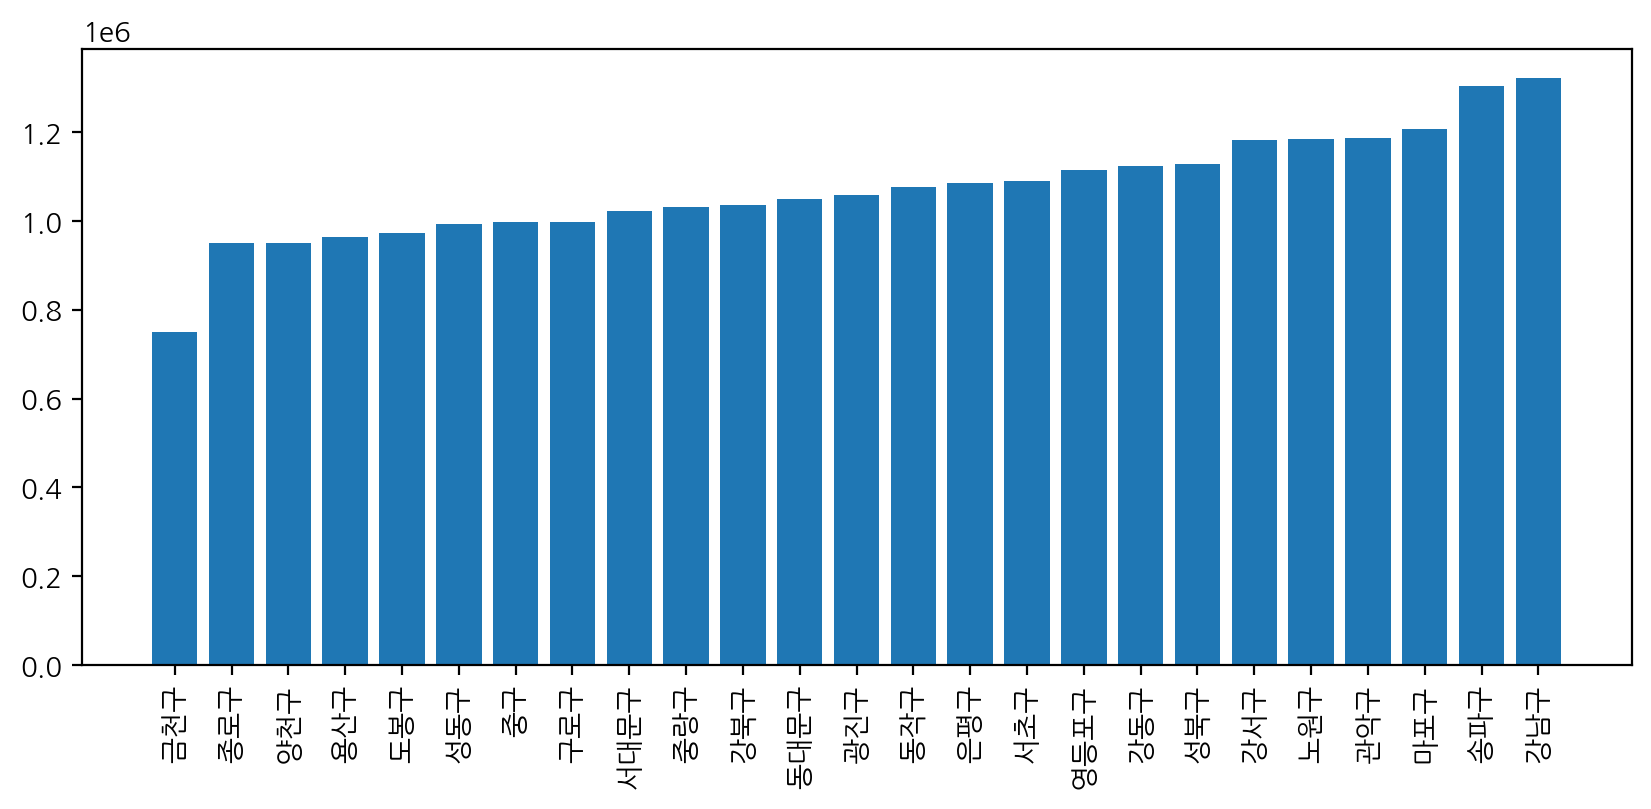

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
229     202209  일    23       종로구        중구  F   0   EE           23   27.97
230     202209  일    23       종로구        중구  F  15   WH          214    8.04
231     202209  일    23       종로구        중구  F  15   EH           34   52.04
232     202209  일    23       종로구        중구  F  15   EE           95    4.09
233     202209  일    23       종로구        중구  F  20   EW           78       0
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
999895  202209  토    23       강동구       송파구  M  70   WH           36   27.92
999896  202209  토    23       강

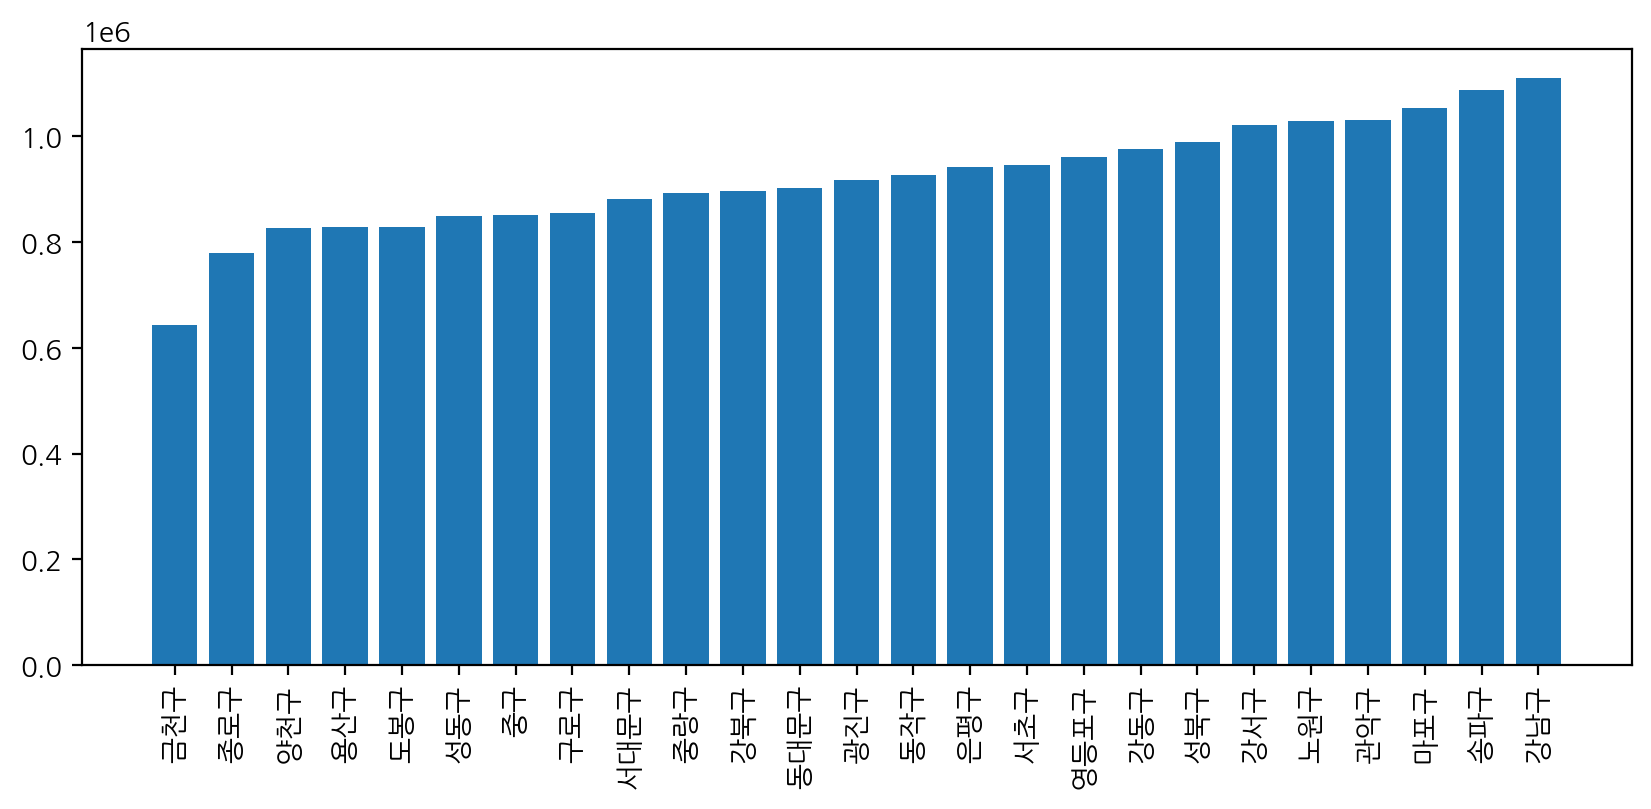

In [6]:
with open("../참고 데이터/csv/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata


from os import listdir

# mport matplotlib.animation as ani

onlyfiles = [f for f in listdir("../참고 데이터/csv/large-datasets/생활이동_자치구_202209/")]
# print(sorted(onlyfiles))

for filename in sorted(onlyfiles):
    with open("../참고 데이터/csv/large-datasets/생활이동_자치구_202209/"+filename, encoding='cp949') as f:
        # print(filename)
        data = pd.read_csv(f)

        data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
        data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

#  tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
        tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}
#tst = {11010:"ㅁㄴㅇㄹ"}
    print(tst)

    data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
    data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
    data = data.replace(tst)

    print(data)

    print(data['이동인구(합)'].size)

    data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
    data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
    print(data2point5)
    data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
    # print(list(data2))
    regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']  
    plt.figure(figsize=(10,4))
    plt.bar(regions, data2point5)
    plt.xticks(range(25), regions, rotation=90)
    plt.savefig("../작업 결과물/forgif2/" + filename + ".png", dpi=96)
    plt.show()

In [7]:
import imageio.v2 as imageio

print('creating gif\n')
from os import listdir

filenames = ["../작업 결과물/forgif2/" + f for f in listdir("../작업 결과물/forgif2/")]
print(filenames)
frames = [imageio.imread(i) for i in filenames]
# skip_ratio =
# with imageio.get_writer('../results/result.gif', mode='I') as writer:
#     for img_id, filename in enumerate(filenames):
#         image = imageio.imread(filename)
#         if img_id % skip_ratio == 0:
#                 writer.append_data(image)
imageio.mimsave('../작업 결과물/result2bar.gif', frames, format='GIF', duration=1.5)
print('gif complete\n')

creating gif

['../작업 결과물/forgif2/생활이동_자치구_2022.09_19시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_18시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_16시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_21시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_12시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_11시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_14시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_10시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_04시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_03시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_13시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_02시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_20시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_07시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_00시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_08시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_23시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_17시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09_22시.csv.png', '../작업 결과물/forgif2/생활이동_자치구_2022.09

## 아니야


In [3]:
with open("../참고 데이터/csv/한국행정구역분류_행정동코드(서울).csv",
          encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류','읍면동']]
newdata

with open("../참고 데이터/csv/large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
#data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

# tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}
#tst = {11010:"ㅁㄴㅇㄹ"}
print(tst)

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data)

print(data['이동인구(합)'].size)


## ok!



{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
224     202209  일     0       종로구        중구  F   0   EE          198   28.13
225     202209  일     0       종로구        중구  F  10   EE           22    5.98
226     202209  일     0       종로구        중구  F  15   EH           97   15.78
227     202209  일     0       종로구        중구  F  15   EE           48   22.29
228     202209  일     0       종로구        중구  F  15   HE           45    3.96
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
792718  202209  토     0       강동구       송파구  M  70   EW           41   13.91
792719  202209  토     0       강

In [5]:
plt.barh(data['이동유형'],data['도착 시군구 코드'])
plt.show()
# 안돼 이럼 더 오래 걸린다아

KeyboardInterrupt: 

### 계획

도착 시군구 코드
금천구      573870
종로구      676074
양천구      717838
용산구      739093
도봉구      745691
성동구      751519
중구       755032
구로구      784906
서대문구     800930
중랑구      811859
강북구      811980
동대문구     831928
광진구      832544
동작구      836118
은평구      841488
서초구      853217
영등포구     884461
강동구      893260
성북구      901851
강서구      936447
노원구      943468
관악구      954664
마포구      959790
송파구     1012979
강남구     1019066
Name: 평균 이동 시간(분), dtype: int64


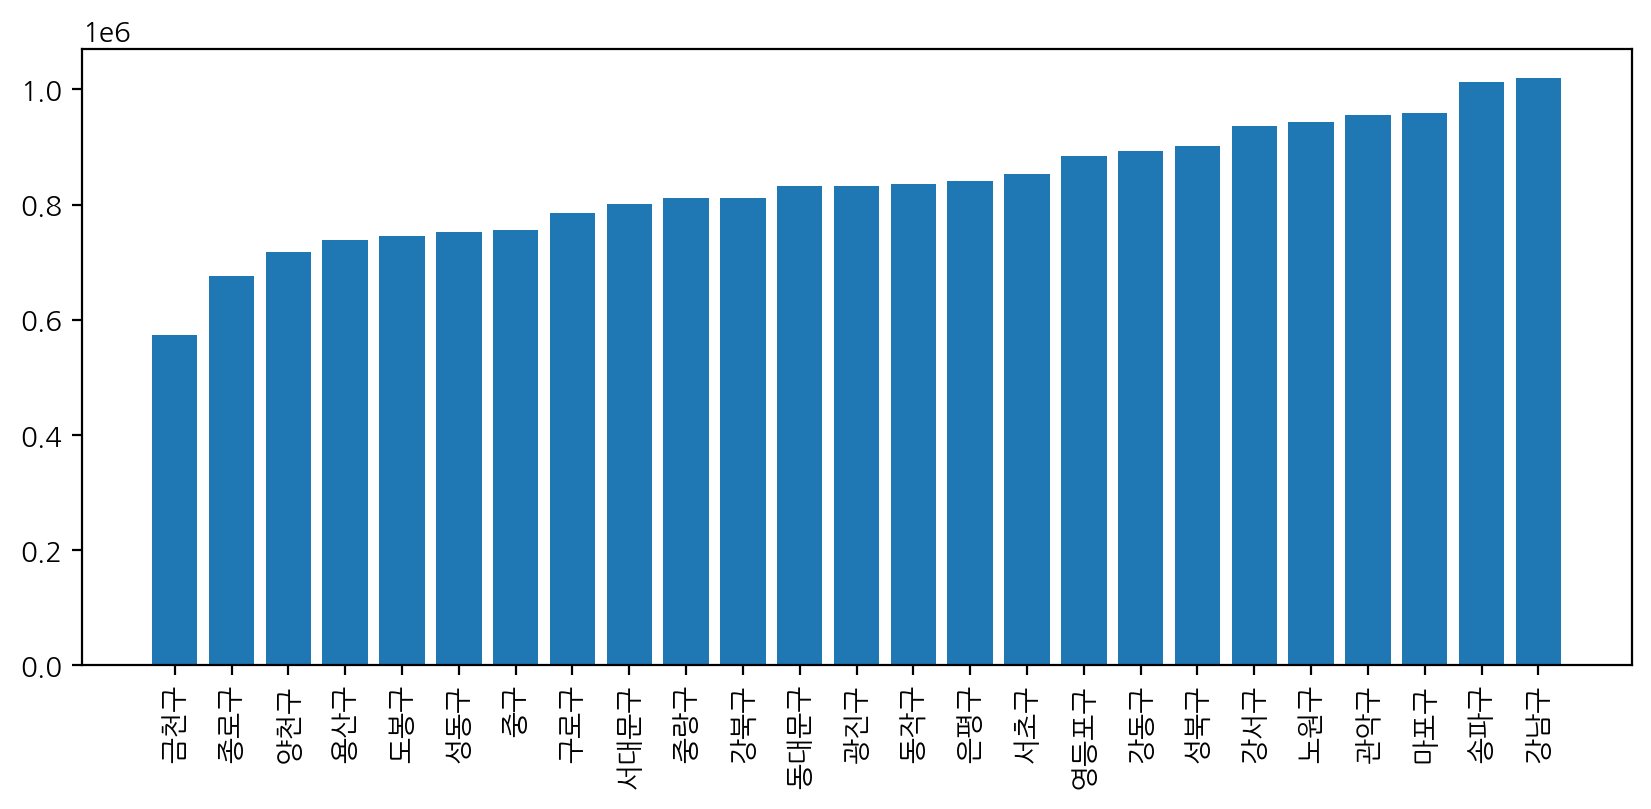

In [59]:
## 진짜 탑텐만 뽑은거 여기다 하고 막대기로 만들자
# 으으 머리야 능률교과서

# 1. data head 10 기준을 하되, 같은 출발시군구는 다 합쳐서..
# 2. 어어.. 출발 도착을 어떻게 할까 고민해보자
# 4. 
# df2 = df.groupby(['address']).sum() 이런걸 쓰보자

data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2point5)
data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
# print(list(data2))
regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']  
plt.figure(figsize=(10,4))
plt.bar(regions, data2point5)
plt.xticks(range(25), regions, rotation=90)
plt.show()

# 헬프 미!!!!

```
혹시 월별 
(출발 - 도착)이나 
(도착) 
유동인구 많은 자치구 그래프와 top 10까지 
내일까지 그리고, 분석해 줄 수 있어?
```
bar, 출발-도착이 루프가 있는거 제외하고
중복을 지우면 곤란하다 중복된거까지 '이동인구(합)' 을 각각 합계에 넣어야 한다



그 서울 이외의 코드가 정확하지 않으면 싹뭉탱이로 '외부'라고 하자





```
(출발-도착)이 너무 많으면

자치구별 총 도착 인구 그래프그리고 분석해도 좋을거같네
```

일단 해보고 나면 
성별	나이 도 어떻게 활용해볼까 ㄱㄱ

# 저 0시부터 23시까지 쌍뭉탱이로 합쳐보았다

In [1]:
from os import listdir
import pandas as pd

filenames = ["../참고 데이터/csv/large-datasets/생활이동_자치구_202209/"+f for f in listdir("../참고 데이터/csv/large-datasets/생활이동_자치구_202209/")]

# with open("../참고 데이터/csv/large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
#           encoding='cp949') as f:
#     data = pd.read_csv(f)

# df = pd.concat(
#     [pd.read_csv(f, encoding='cp949') for f in filenames], ignore_index=True
#     )
print([pd.read_csv(f,encoding='cp949') for f in filenames])



: 

: 

# 터졋다 뭐지

In [ ]:
graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())

#for node in graph:

import random


an = data['도착 시군구 코드']
an = an.drop_duplicates()
print(an)
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
print(color)
# pos = nx.spring_layout(graph)
# nx.draw_networkx_nodes(graph, pos, node_color=color,)
# nx.draw_networkx_edges(graph, pos, width=0.01,)
#nx.draw(graph, with_labels=False, node_color=color,pos=nx.fruchterman_reingold_layout(graph),node_size=7, arrows=False, width=0.001,)
edge_labels = nx.get_edge_attributes(graph, "이동인구(합)")
nx.draw(graph,
        with_labels=True,
        node_color=color,
        node_size=7,
        arrows=False,
        width=0.1,
        font_family='NanumGothic',
        pos=nx.spring_layout(graph))

plt.title("ㅁㄴㅇㄹ")
plt.axis('off')
plt.show()

# 그래프 html 출력
# nt = Network(height='1080px', width='80%',)


# nt.from_nx(graph)
# nt.toggle_physics(False)
# nt.show_buttons(filter_=['physics'])
# nt.show('../results/res1.html')


# 이 파일에서는 어떤 곳이 유동인구가 많은지 그랲 그리지 말고 텍스트로 판별을 내볼 생각에요.